# PREOPS-597: Process the Saha Bulge dataset in Gen3

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import importlib
import pandas as pd

from astropy.coordinates import SkyCoord
import astropy.units as u
from types import SimpleNamespace
from astropy.visualization import (ZScaleInterval, SqrtStretch, ImageNormalize)

import lsst.geom
import lsst.afw.display as afwDisplay
import lsst.afw.display as afw_display
afwDisplay.setDefaultBackend('matplotlib')
import lsst.daf.butler as dafButler
import lsst.dax.apdb as daxApdb
from lsst.ap.association import UnpackApdbFlags, TransformDiaSourceCatalogConfig, DiaPipelineConfig
from lsst.pipe.base import Struct
import IPython
from IPython.display import IFrame

Overriding default configuration file with /opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-4.0.1/Linux64/dustmaps_cachedata/g41a3ec361e+ac198e9f13/config/.dustmapsrc


In [2]:
sys.path.append('/project/kherner/PREOPS-597_SahaBulge/ap_pipe-notebooks/')

In [3]:
import diaObjectAnalysis as doa
import apdbPlots as pla
import plotLightcurve as plc
import coaddAnalysis as coa

In [4]:
repo = '/repo/main'
butler = dafButler.Butler(repo)

In [5]:
# The nominal latest run
default_best = SimpleNamespace(collection = 'u/kherner/PREOPS-597_20220120',
                               apdb = 'lsstdevapdb1',
                               schema='kherner_PREOPS_597_20220122',
                               selname = 'goodSeeing')

                               
    
oldproc =  SimpleNamespace(collection = 'u/kherner/PREOPS-597_20211026',
                               apdb = 'lsstdevapdb1',
                               schema='kherner',
                               selname = 'goodSeeing')   

Default values but only running over three CCDs

In [6]:
default_Feb10 = SimpleNamespace(collection = 'u/kherner/PREOPS-597_20220210',
                               apdb = 'lsstdevapdb1',
                               schema='kherner_PREOPS_597_20220210',
                               selname = 'goodSeeing')

Change the background fitting order to 3, running over three CCDs

In [7]:
default_bg3 = SimpleNamespace(collection = 'u/kherner/PREOPS-597_20220216_bg3',
                               apdb = 'lsstdevapdb1',
                               schema='kherner_preops_597_20220216_bg3',
                               selname = 'goodSeeing')

Change the background fitting order to 4, running over three CCDs

In [8]:
default_bg4 = SimpleNamespace(collection = 'u/kherner/PREOPS-597_20220218_bg4',
                               apdb = 'lsstdevapdb1',
                               schema='kherner_preops_597_20220218_bg4',
                               selname = 'goodSeeing')

Change the background fitting order to 5, running over three CCDs

In [9]:
default_bg5 = SimpleNamespace(collection = 'u/kherner/PREOPS-597_20220218_bg5',
                               apdb = 'lsstdevapdb1',
                               schema='kherner_preops_597_20220218_bg5',
                               selname = 'goodSeeing')

In [10]:
skymap = butler.get('skyMap', skymap='hsc_rings_v1',instrument='DECam', collections='DECam/defaults/saha_bulge')

In [11]:
apdbs_nonempty = [default_Feb10, default_bg3, default_bg4, default_bg5]

badFlagList = ['base_PixelFlags_flag_bad',
               'base_PixelFlags_flag_suspect',
               'base_PixelFlags_flag_saturatedCenter',
               'base_PixelFlags_flag_interpolated',
               'base_PixelFlags_flag_interpolatedCenter',
               'base_PixelFlags_flag_edge',
              ]

print(f'N DiaSources and N "good" DiaSources in each collection')
print(f'-------------------------------------------------------')
for run in apdbs_nonempty:
    collection = run.collection
    apdb = run.apdb
    schema = run.schema
    objTable, srcTable, goodObj, goodSrc = pla.loadTables(repo,
                                                          dbType='postgres',
                                                          dbName=apdb,
                                                          gen='gen3',
                                                          schema=schema,
                                                          instrument='DECam',
                                                          badFlagList=badFlagList)
    print(f'{len(srcTable):7d}\t{len(goodSrc):7d}\t\t{collection.split("/")[-1]}')

N DiaSources and N "good" DiaSources in each collection
-------------------------------------------------------


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.0.1/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.0.1/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2567187	1984046		PREOPS-597_20220210


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.0.1/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.0.1/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2569648	1982964		PREOPS-597_20220216_bg3


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.0.1/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.0.1/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2604536	2007547		PREOPS-597_20220218_bg4


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.0.1/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.0.1/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2615539	2011978		PREOPS-597_20220218_bg5


In [12]:
def compareCCD(runlist, visit, ccd):
    """Make comparison plots for the same visit and CCD for each member
    of a list of SimpleNamespace elements.
    
    Parameters
    ----------
    runlist: `list` of `SimpleNamespace`
        list of SimpleNamespace elements you want to compare.
    visit: `int`
        Visit number
    ccd: `int`
        CCD/detector number
    """
    
    fig = plt.figure(figsize=[12.0, 6.0])
    gspec = fig.add_gridspec(1,len(runlist))
    
    iplt=0
    for run in runlist:
        collection = run.collection
        apdb = run.apdb
        schema=run.schema
        dbPath = apdb
        objTable, srcTable, goodObj, goodSrc = pla.loadTablesByVisit(repo,
                                                                     visit,
                                                          dbType='postgres',
                                                          dbName=dbPath,
                                                          schema=schema,
                                                          gen='gen3',
                                                          instrument='DECam')
        srcTable = pla.addVisitCcdToSrcTable(srcTable, instrument='DECam',
                                             gen='gen3', butler=butler)
        flagTable, srcTableFlags, flagFilter, goodSrc, goodObj = pla.makeSrcTableFlags(srcTable,
                                                                                       objTable,
                                                                                       badFlagList=badFlagList,
                                                                                       gen='gen3', 
                                                                                       instrument='DECam',
                                                                                       repo=repo)
        ax = fig.add_subplot(gspec[0,iplt%len(runlist)])
        #ax = fig.add_subplot(1,iplt%len(runlist))
        #for count, myccd in enumerate(np.unique(sourceTable['ccd'].values)):
        sourceTable = goodSrc
        idx = sourceTable.ccd == ccd
        ax.scatter(sourceTable.ra[idx], sourceTable.decl[idx], c='C2',
                   marker='.', s=10, alpha=0.2)
        ax.set_title(collection, size=8)
        ax.invert_xaxis()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        #pla.plotDiaSourcesOnSkyGrid(repo, goodSrc.loc[goodSrc['ccd'] == ccd ],
        #                            title=collection, color='C2', size=5)
        iplt += 1
    plt.show()

In [42]:
def makeplots(run, visit):
    """Make disgnostic plots for a given collection and visit combination
    
    Parameters
    ----------
    run: `SimpleNamespace`
        struct containing collection name, DB name, 
    visit: `int`
        Visit number
    """
    collection = run.collection
    apdb = run.apdb
    schema=run.schema
    print(collection, apdb)
    dbPath = apdb
    objTable, srcTable, goodObj, goodSrc = pla.loadTablesByVisit(repo, visit,
                                                          dbType='postgres',
                                                          dbName=dbPath,
                                                          schema=schema,
                                                          gen='gen3',
                                                          instrument='DECam')
    srcTable = pla.addVisitCcdToSrcTable(srcTable, instrument='DECam', gen='gen3', butler=butler)
    flagTable, srcTableFlags, flagFilter, goodSrc, goodObj = pla.makeSrcTableFlags(srcTable, objTable,
                                                                                   badFlagList=badFlagList,
                                                                                   gen='gen3', instrument='DECam',
                                                                                   repo=repo)
    
    # Good DIA Sources by visit
    #bandList = ['g', 'i']
    bandList = [ srcTable['filterName'][0] ]
    colorList = ['C2', 'C1']
    for band, color in zip(bandList, colorList):
        pla.plotDiaSourcesOnSkyGrid(repo, goodSrc.loc[goodSrc['filterName'] == band],
                                    title=band+' band', color=color, size=5)
    
    # How many DIA Sources comprise each DIA Object
    hist = doa.plotDiaObjectHistogram(objTable, goodObj)
    
    # Flag bar chart
    pla.plotFlagHist(srcTable, badFlagList=badFlagList)
    
    # Flux distributions
    pla.plotFluxHistSrc(goodSrc.loc[goodSrc['filterName'] == bandList[0]], fluxType='psFlux',
                        title='DIA Sources, DECam-'+bandList[0]+', Diffim PSF Flux',
                        color1='C2', binmin=-1e4, binmax=1e4)
    pla.plotFluxHistSrc(goodSrc.loc[goodSrc['filterName'] == bandList[0]], fluxType='totFlux',
                        title='DIA Sources, DECam-'+bandList[0]+', Calexp PSF Flux',
                        color1='C2', binmin=-1e4, binmax=2e4)
    
    
    # Flux histograms
    pla.source_magnitude_histogram(repo, goodSrc, bandList[0], 'DECam',
                                   collection, detectorToUse=oneDetector)
    
    pla.plotDiaSourceDensityInFocalPlane(repo,goodSrc,gen='gen3',
                                         instrument='DECam',
                                         collections=collection)
 
    # Dia sources per visit
    #pla.plotDiaSourcesPerVisit(repo, goodSrc, title='Visit '+str(visit),
    #                           gen='gen3', instrument='DECam', collections=collection)

    
    # A few cutouts
    for index, source in goodSrc[2050:2054].iterrows():
        dataId = {'detector': int(goodSrc['ccd'][index]), 'visit': int(goodSrc['visit'][index]), 'instrument': 'DECam'}
        center = lsst.geom.SpherePoint(goodSrc['ra'][index], goodSrc['decl'][index], lsst.geom.degrees)
        try:
            scienceCutout, differenceCutout, templateCutout = plc.retrieveCutouts(butler, dataId, collection, center, diffName=run.selname)
            plc.plotCutout(scienceCutout, differenceCutout, templateCutout)
        except:
            print('Error retrieving cutout for source {}. Skipping.'.format(index))

In [43]:
def makeBandPlots(run, band):
    """ Make diagnostic plots for a given collection and band
    
    Parameters
    ----------
    run: `SimpleNamespace`
        Desired collection, DB schema, etc.
    band: `str`
        Desired band
    """
    collection = run.collection
    apdb = run.apdb
    schema=run.schema
    print(collection, apdb)
    dbPath = apdb
    objTable, srcTable, goodObj, goodSrc = pla.loadTablesByBand(repo, band,
                                                          dbType='postgres',
                                                          dbName=dbPath,
                                                          schema=schema,
                                                          gen='gen3',
                                                          instrument='DECam')
    srcTable = pla.addVisitCcdToSrcTable(srcTable, instrument='DECam', gen='gen3', butler=butler)
    flagTable, srcTableFlags, flagFilter, goodSrc, goodObj = pla.makeSrcTableFlags(srcTable, objTable,
                                                                                   badFlagList=badFlagList,
                                                                                   gen='gen3', instrument='DECam',
                                                                                   repo=repo)
    
    bandList = [ band ]
    colorList = ['C2', 'C1']
    for band, color in zip(bandList, colorList):
        pla.plotDiaSourcesOnSkyGrid(repo, goodSrc.loc[goodSrc['filterName'] == band],
                                    title=band+' band', color=color, size=5)
    
    # How many DIA Sources comprise each DIA Object
    hist = doa.plotDiaObjectHistogram(objTable, goodObj)
    
    # Flag bar chart
    pla.plotFlagHist(srcTable, badFlagList=badFlagList)
    
    # Flux distributions
    pla.plotFluxHistSrc(goodSrc.loc[goodSrc['filterName'] == bandList[0]], fluxType='psFlux',
                        title='DIA Sources, DECam-'+bandList[0]+', Diffim PSF Flux',
                        color1='C2', binmin=-1e4, binmax=1e4)
    pla.plotFluxHistSrc(goodSrc.loc[goodSrc['filterName'] == bandList[0]], fluxType='totFlux',
                        title='DIA Sources, DECam-'+bandList[0]+', Calexp PSF Flux',
                        color1='C2', binmin=-1e4, binmax=2e4)
    
    
    # Flux histograms
    pla.source_magnitude_histogram(repo, goodSrc, bandList[0], 'DECam',
                                   collection, detectorToUse=oneDetector)
    
    pla.plotDiaSourceDensityInFocalPlane(repo,goodSrc,gen='gen3',
                                         instrument='DECam',
                                         collections=collection)
 
    # Dia sources per visit
    #pla.plotDiaSourcesPerVisit(repo, goodSrc, title='Visit '+str(visit),
    #                           gen='gen3', instrument='DECam', collections=collection)

    
    # A few cutouts
    for index, source in goodSrc[2050:2054].iterrows():
        dataId = {'detector': int(goodSrc['ccd'][index]), 'visit': int(goodSrc['visit'][index]), 'instrument': 'DECam'}
        center = lsst.geom.SpherePoint(goodSrc['ra'][index], goodSrc['decl'][index], lsst.geom.degrees)
        try:
            scienceCutout, differenceCutout, templateCutout = plc.retrieveCutouts(butler, dataId, collection, center, diffName=run.selname)
            plc.plotCutout(scienceCutout, differenceCutout, templateCutout)
        except:
            print('Error retrieving cutout for source {}. Skipping.'.format(index))

diffim variance median
----------------------
2999.108643	PREOPS-597_20220120
2814.059082	PREOPS-597_20211026
2917.586182	PREOPS-597_20220210
2921.890137	PREOPS-597_20220216_bg3
2933.243408	PREOPS-597_20220218_bg4
2922.226562	PREOPS-597_20220218_bg5


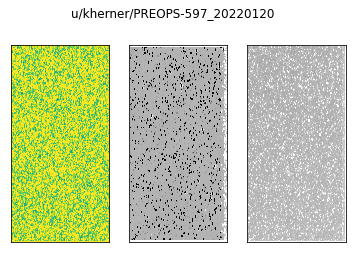

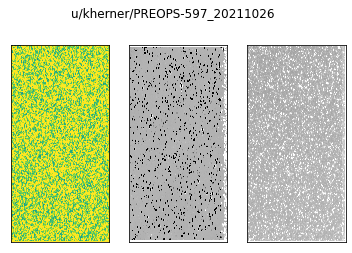

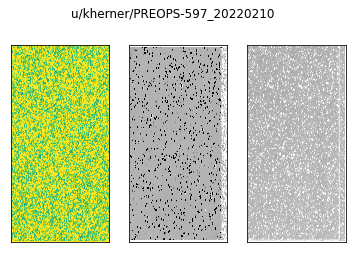

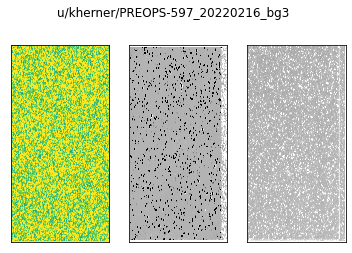

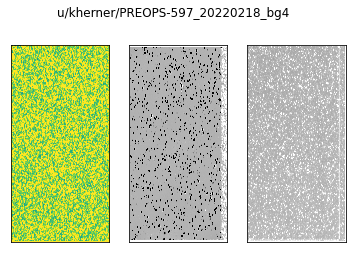

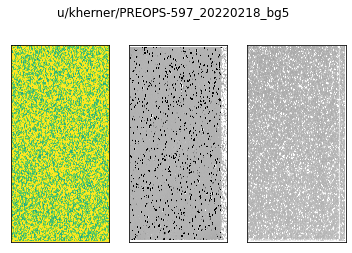

In [15]:
oneVisit = 216144
oneDetector = 49
collection_list = [default_best, oldproc, default_Feb10, default_bg3, default_bg4, default_bg5]
print(f'diffim variance median')
print(f'----------------------')
for collections in collection_list:
    
#for collections in [default_best.collection, preconvolve_best.collection]:
    calexp = butler.get('calexp', instrument='DECam',
                        visit=oneVisit, detector=oneDetector, collections=collections.collection)
    diffim = butler.get(collections.selname+'Diff_differenceExp', instrument='DECam',
                        visit=oneVisit, detector=oneDetector, collections=collections.collection)

    calexpNorm = ImageNormalize(calexp.image.array, interval=ZScaleInterval(), stretch=SqrtStretch())
    diffimNorm = ImageNormalize(diffim.image.array, interval=ZScaleInterval(), stretch=SqrtStretch())
    diffimVarNorm = ImageNormalize(diffim.variance.array, interval=ZScaleInterval(), stretch=SqrtStretch())

    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, subplot_kw={'xticks': [], 'yticks': []})
    fig.suptitle(collections.collection)
    
   
    ax1.imshow(calexp.image.array, cmap='gray', norm=calexpNorm)
    ax1.imshow(calexp.image.array, norm=diffimNorm)
    ax2.imshow(diffim.image.array, cmap='gray', norm=diffimNorm)
    ax3.imshow(diffim.variance.array, cmap='gray', norm=diffimVarNorm)
    
    
    print(f'{np.nanmedian(diffim.variance.array):8f}\t{(collections.collection).split("/")[-1]}')

In [16]:
calexp = butler.get('calexp', instrument='DECam',
                        visit=oneVisit, detector=oneDetector, collections=collections.collection)

Plot a given visit and CCD side-by-side for each of the background fitting orders.

/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.0.1/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.0.1/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.0.1/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlche

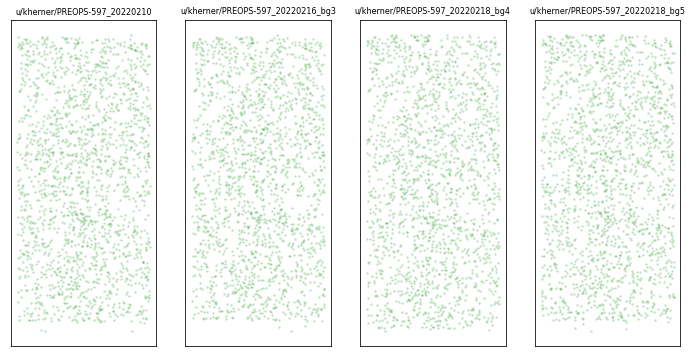

In [17]:
collection_list = [default_Feb10, default_bg3, default_bg4, default_bg5]
compareCCD(collection_list, oneVisit, oneDetector)

Some diagnostic plots.

u/kherner/PREOPS-597_20220120 lsstdevapdb1


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.0.1/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.0.1/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


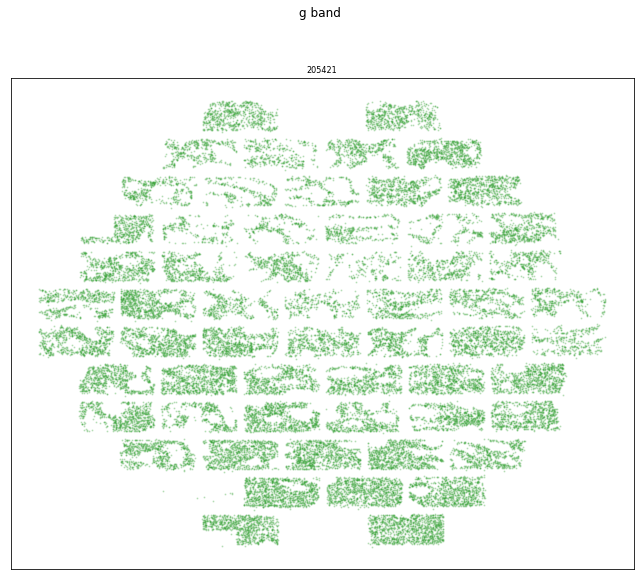

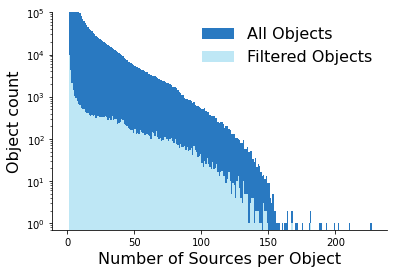

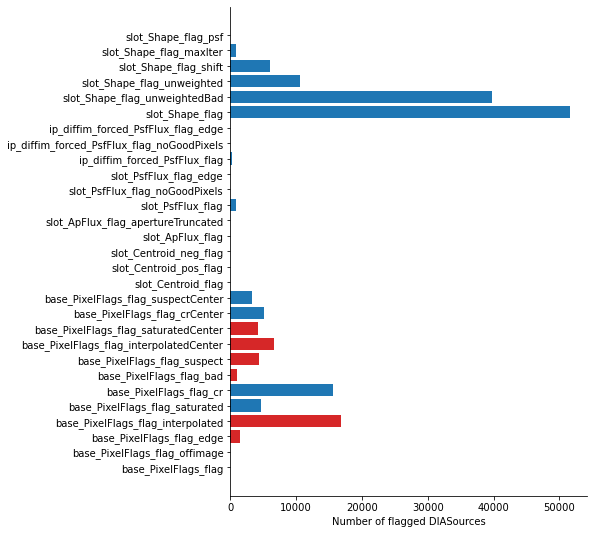

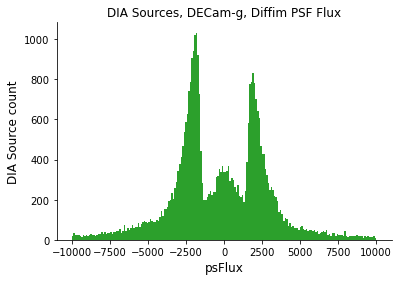

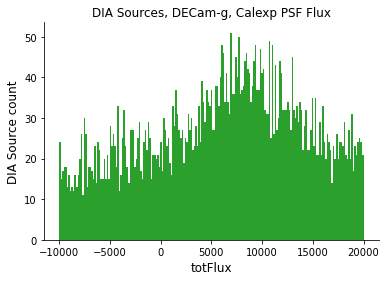

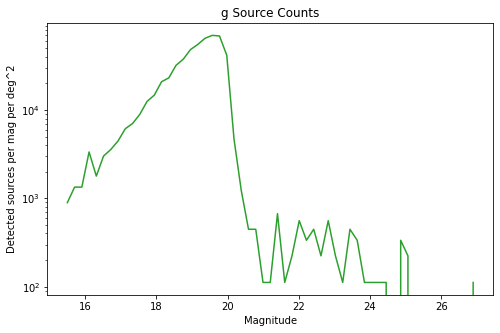

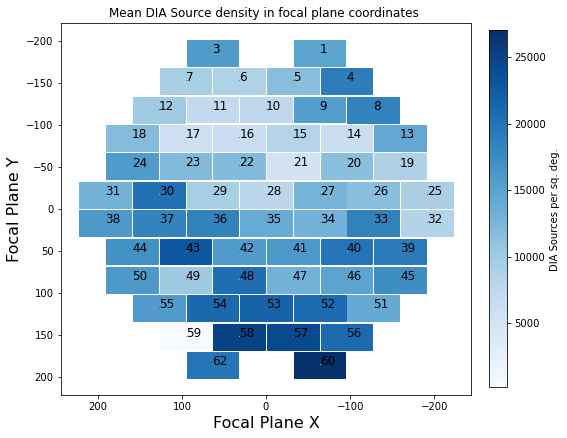

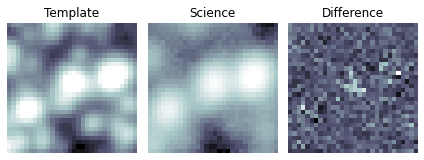

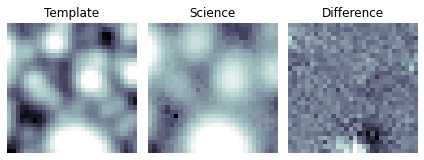

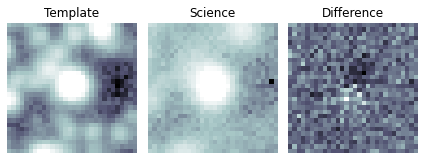

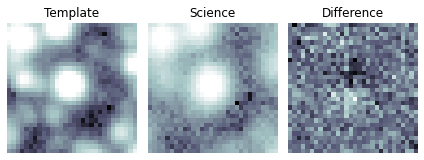

In [18]:
makeplots(default_best, 205421)

For the background fit order comparison runs, we only run CCDs 10, 49, and 50.

u/kherner/PREOPS-597_20220210 lsstdevapdb1


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.0.1/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.0.1/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


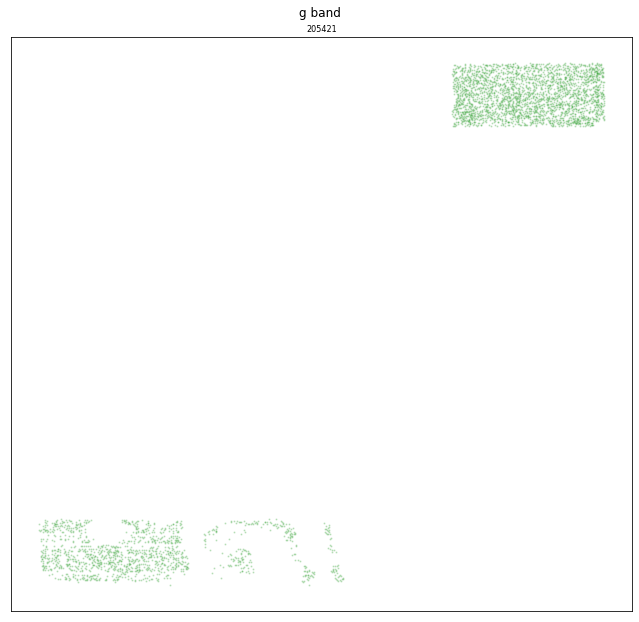

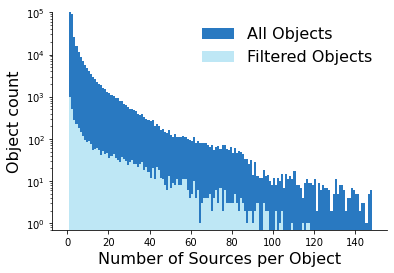

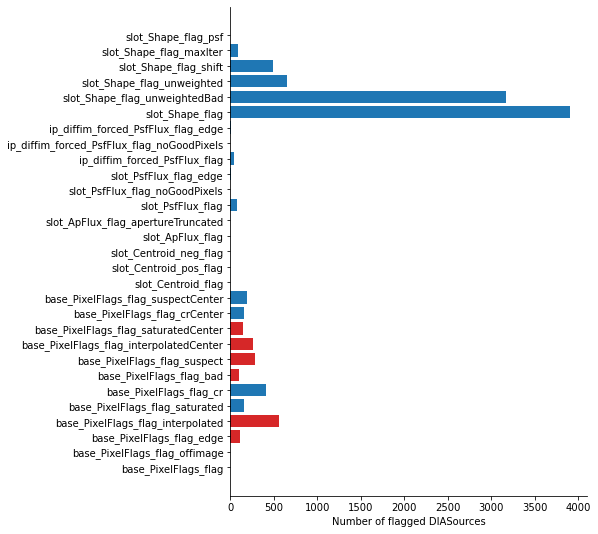

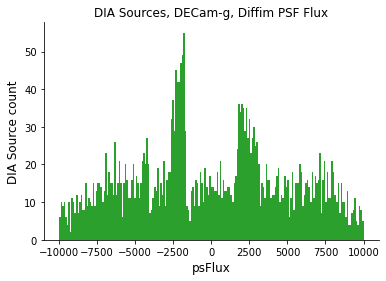

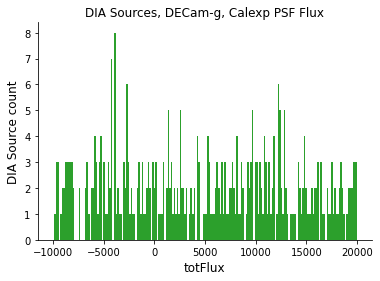

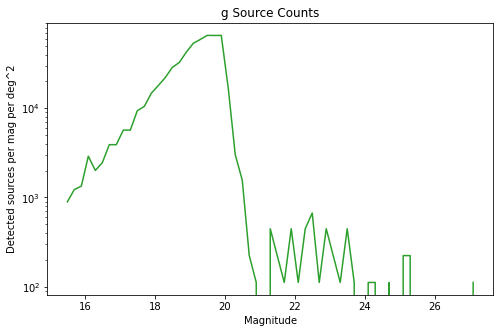

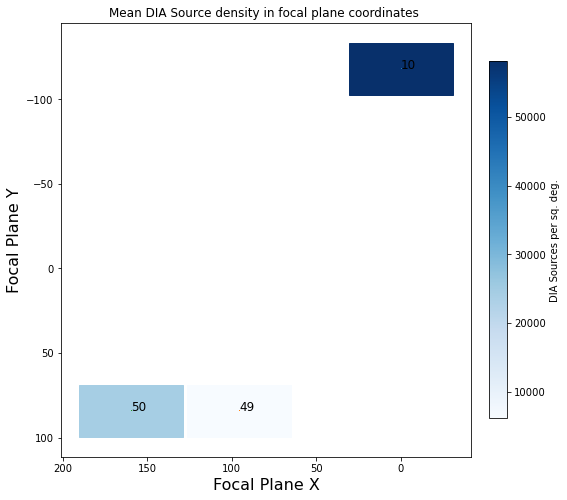

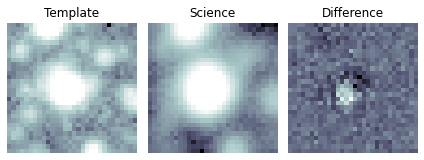

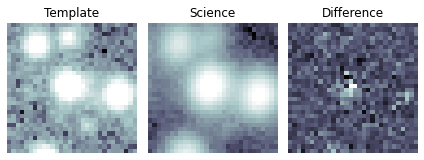

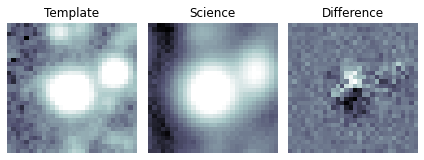

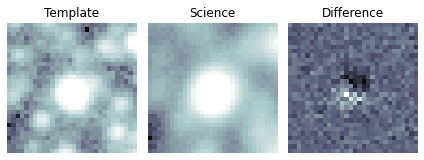

In [19]:
makeplots(default_Feb10, 205421)

u/kherner/PREOPS-597_20220210 lsstdevapdb1
tables[src] = "DiaSource"


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-1.0.0/lib/python3.8/site-packages/pandas/io/sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


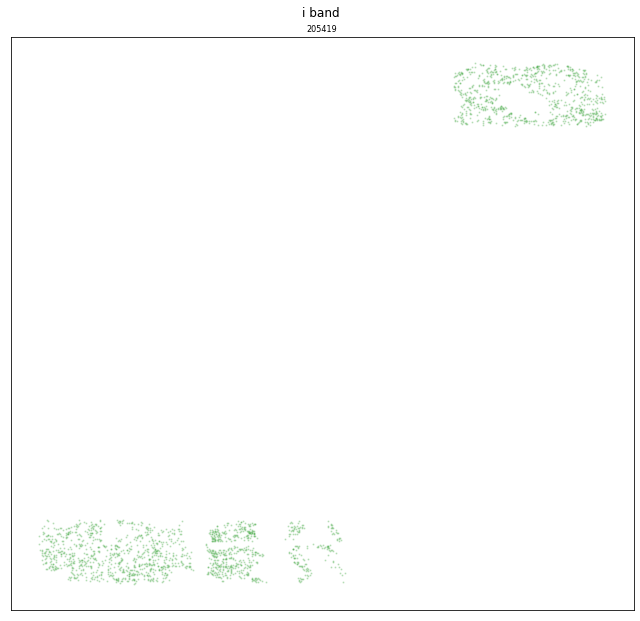

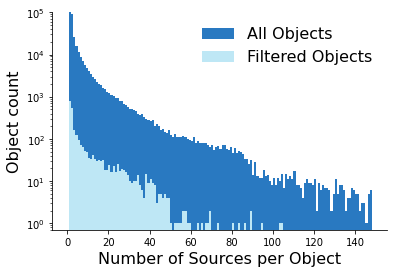

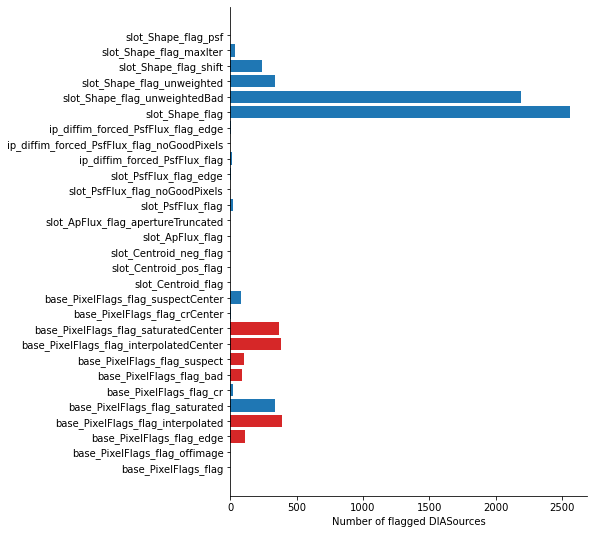

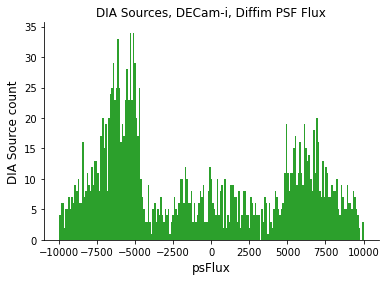

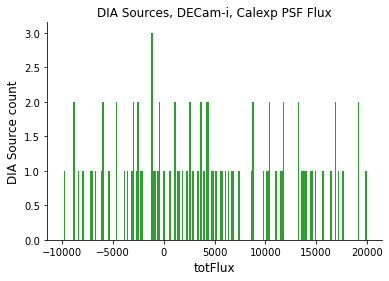

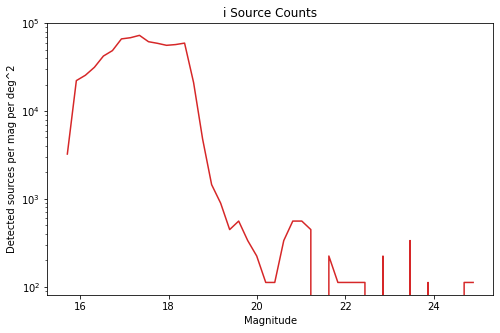

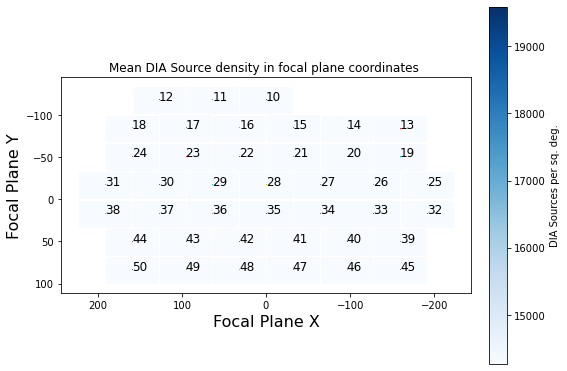

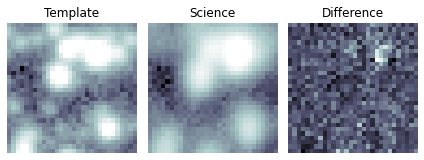

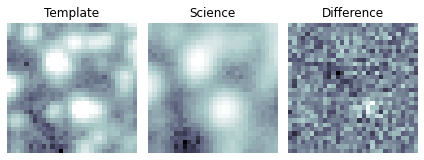

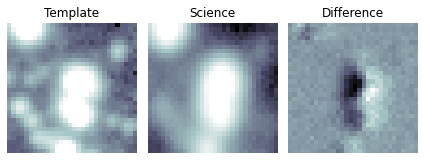

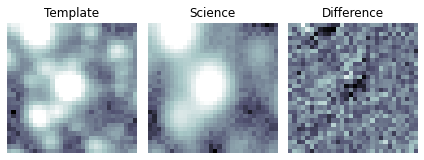

In [16]:
makeplots(default_Feb10, 205419)

u/kherner/PREOPS-597_20220216_bg3 lsstdevapdb1


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-1.0.0/lib/python3.8/site-packages/pandas/io/sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


tables[src] = "DiaSource"


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-1.0.0/lib/python3.8/site-packages/pandas/io/sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


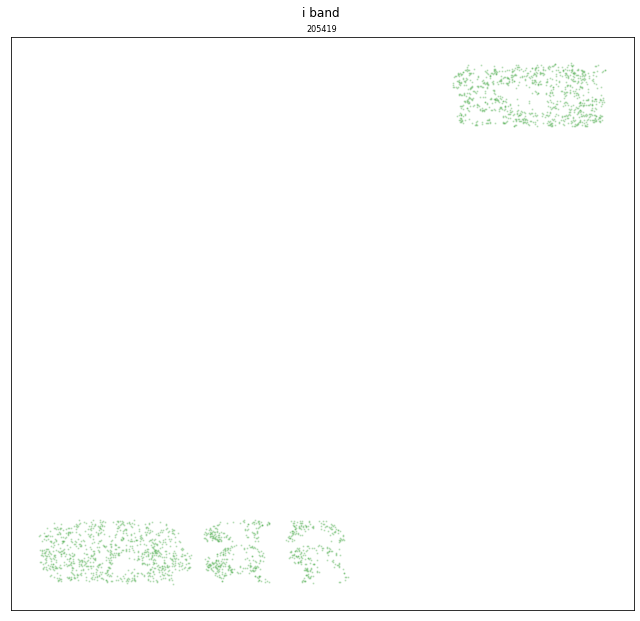

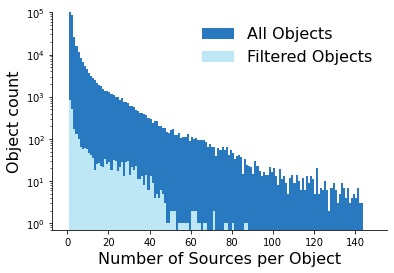

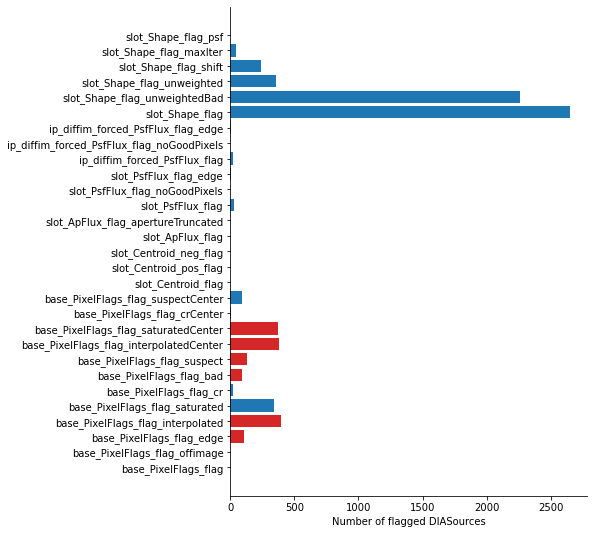

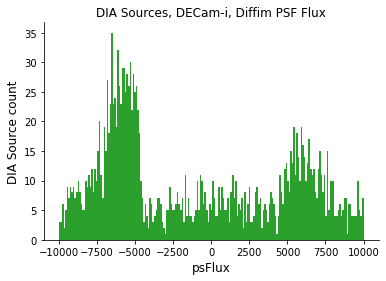

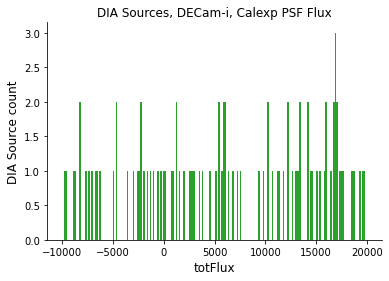

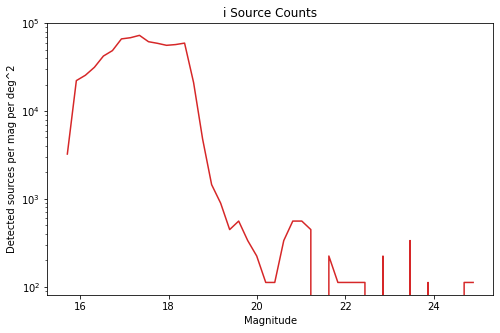

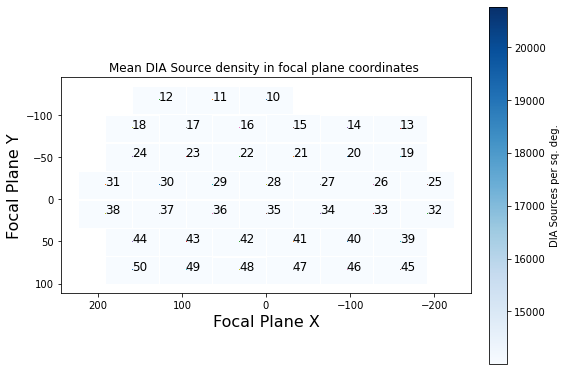

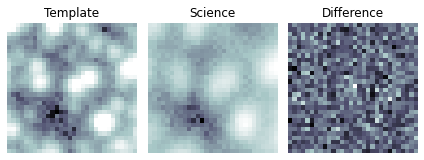

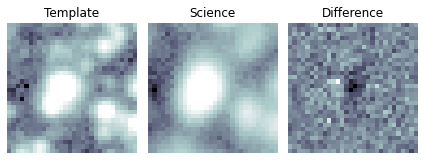

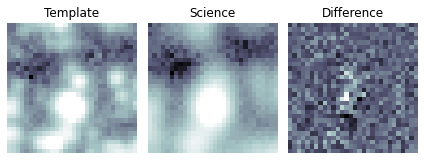

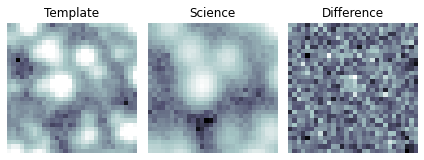

In [11]:
makeplots(default_bg3, 205419)

u/kherner/PREOPS-597_20220218_bg4 lsstdevapdb1


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.0.1/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.0.1/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


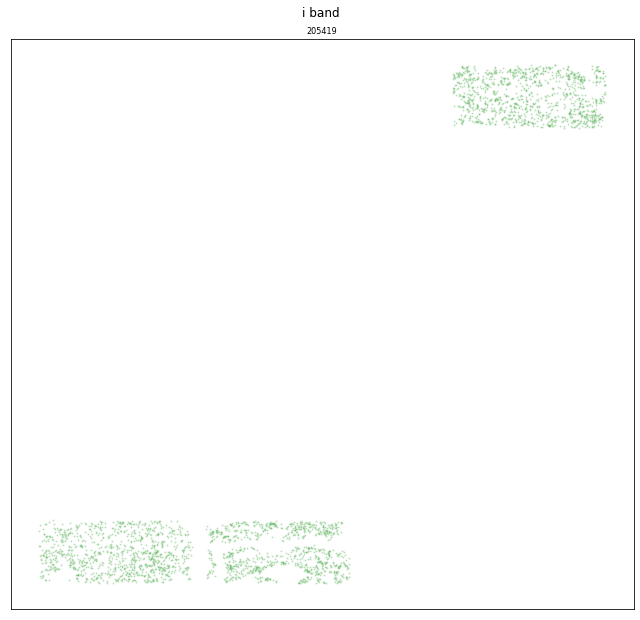

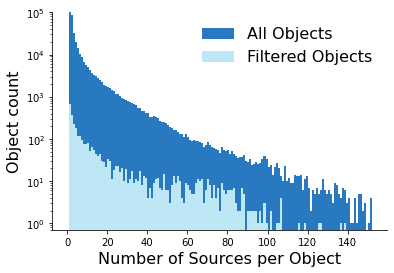

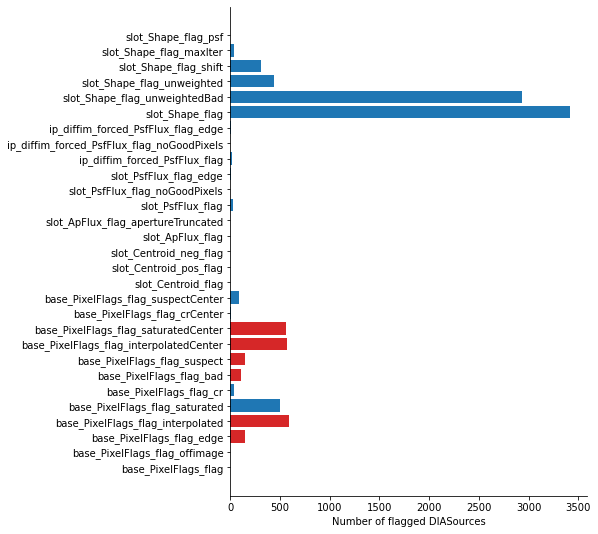

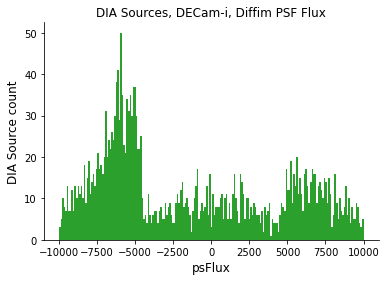

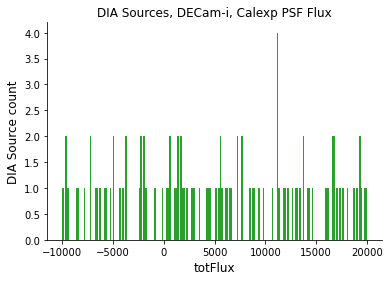

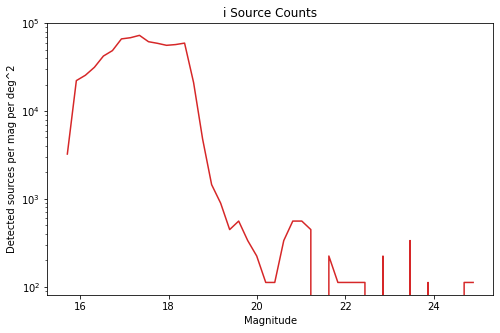

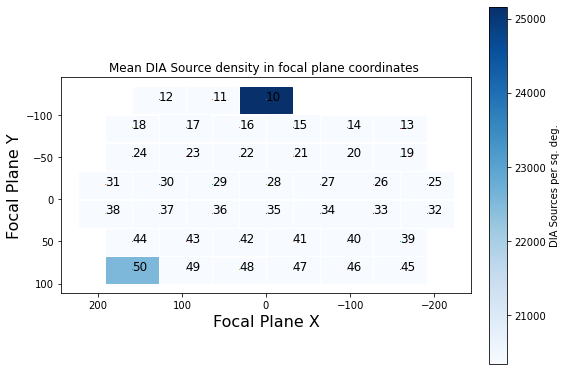

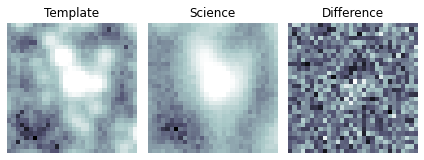

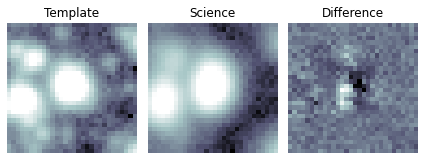

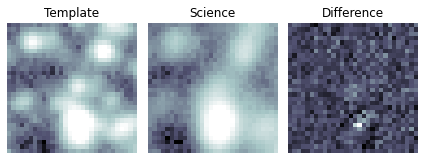

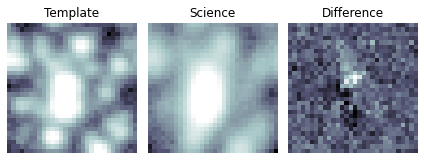

In [20]:
makeplots(default_bg4, 205419)

u/kherner/PREOPS-597_20220218_bg5 lsstdevapdb1


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.0.1/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.0.1/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


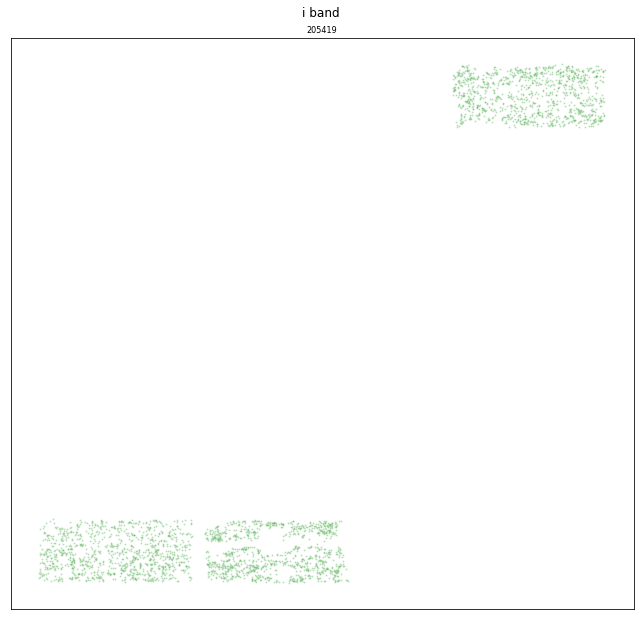

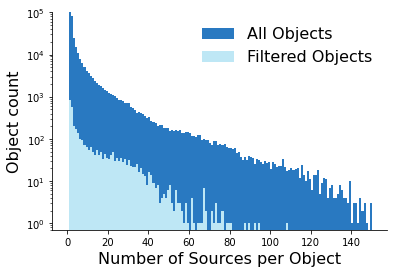

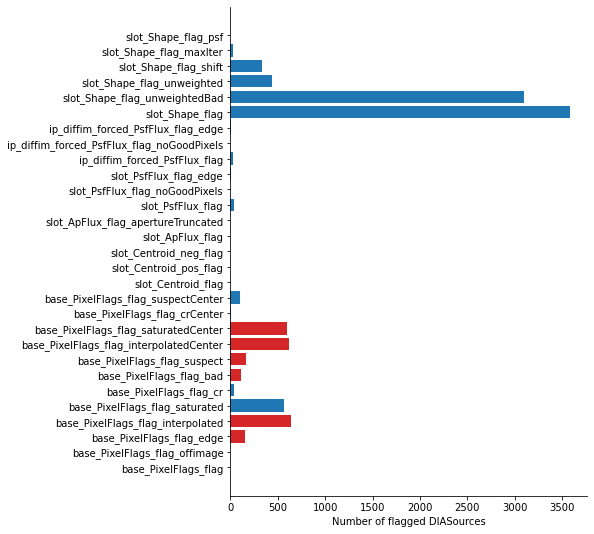

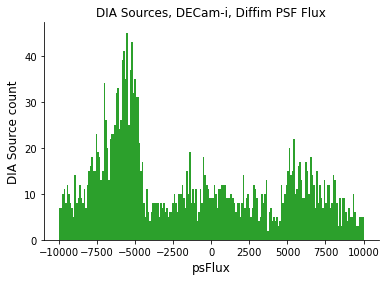

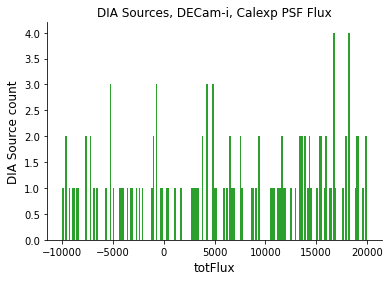

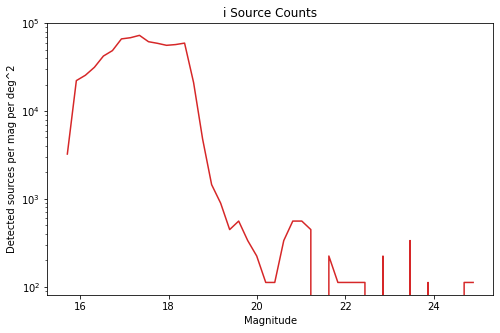

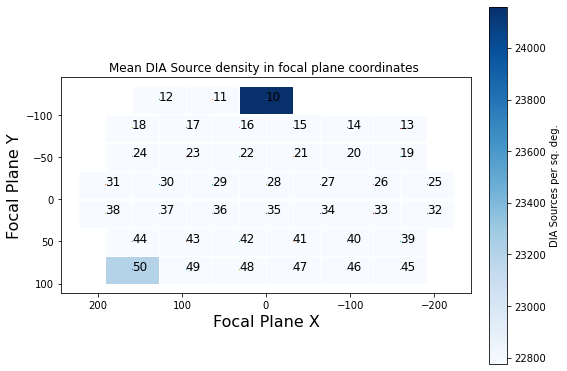

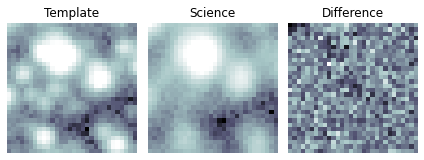

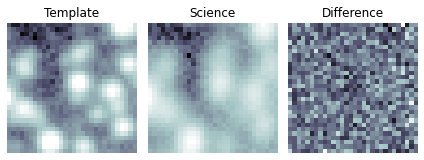

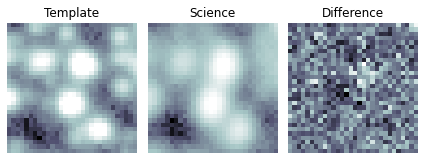

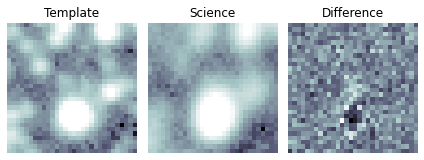

In [21]:
makeplots(default_bg5, 205419)

u/kherner/PREOPS-597_20220120 lsstdevapdb1


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.0.1/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.0.1/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


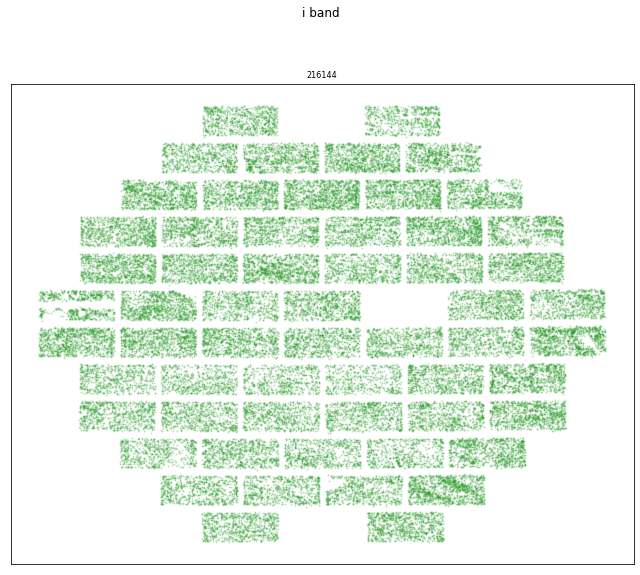

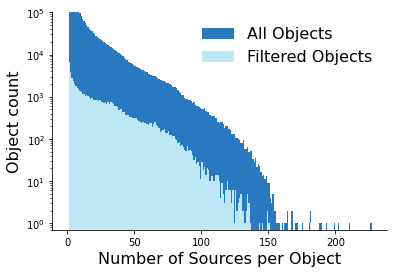

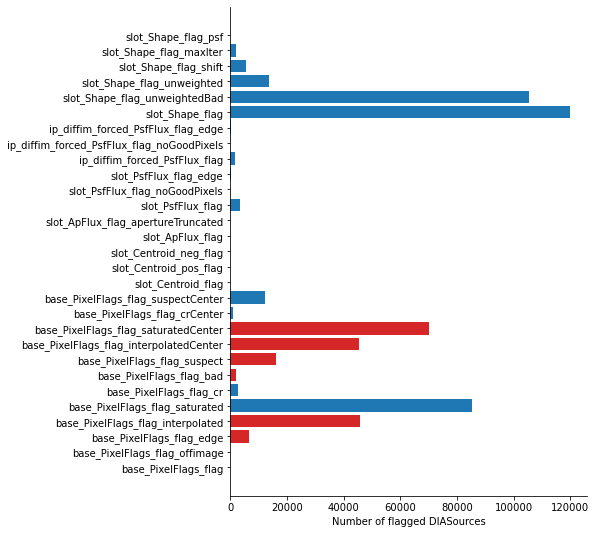

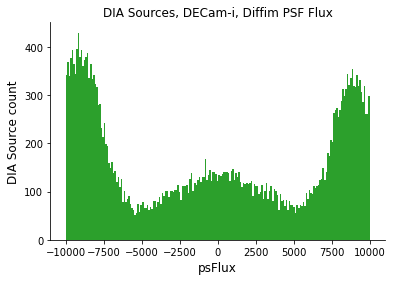

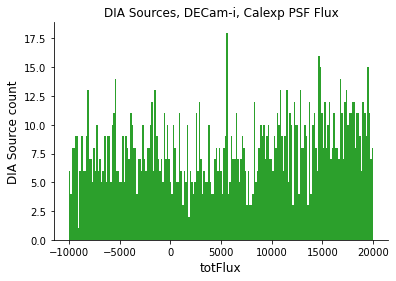

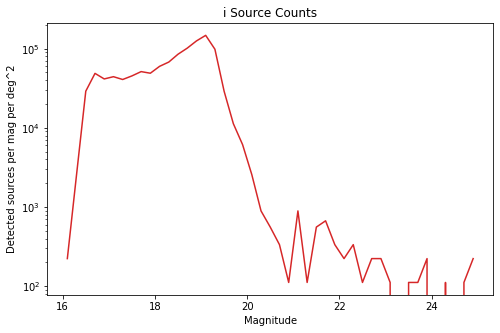

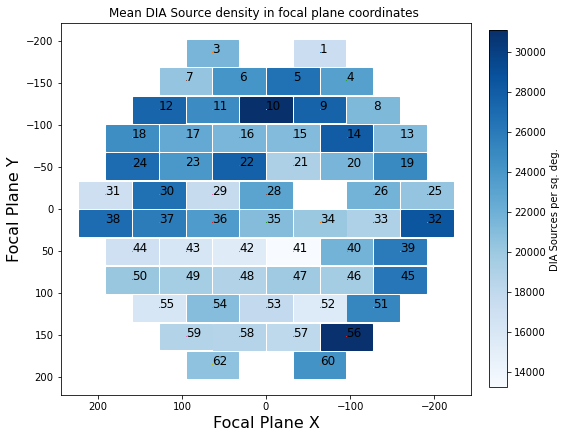

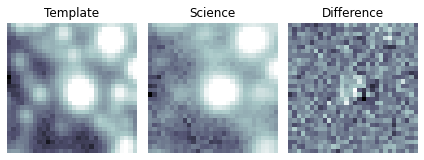

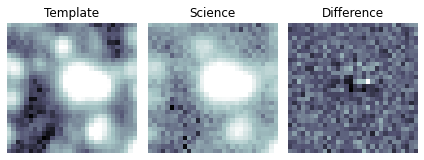

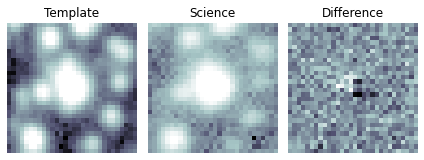

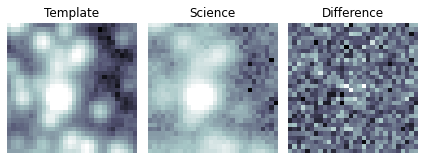

In [22]:
makeplots(default_best,216144)

u/kherner/PREOPS-597_20220210 lsstdevapdb1


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.0.1/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.0.1/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


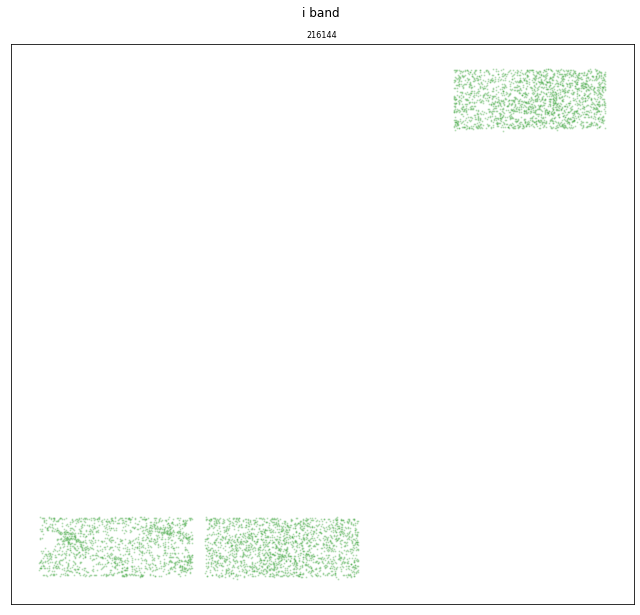

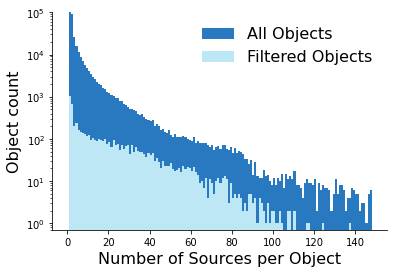

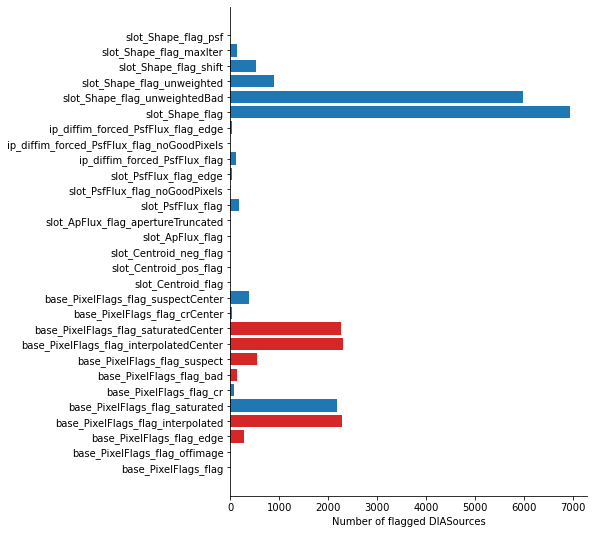

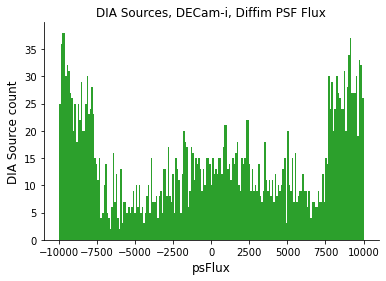

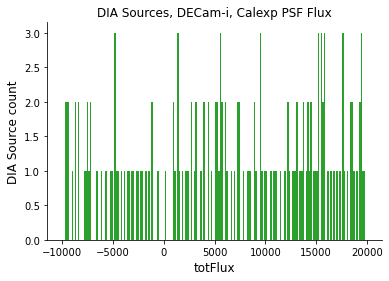

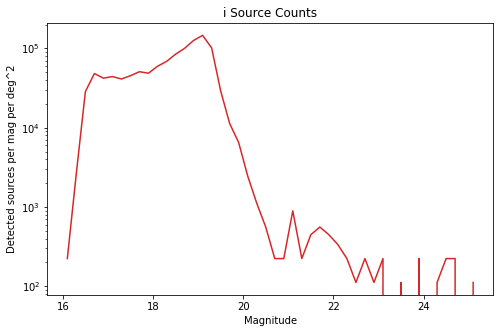

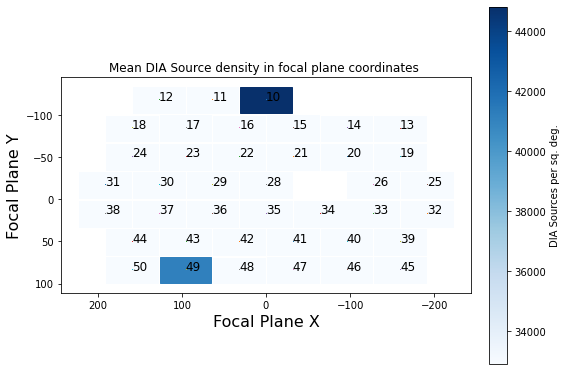

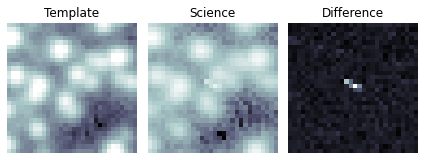

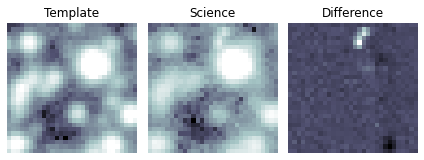

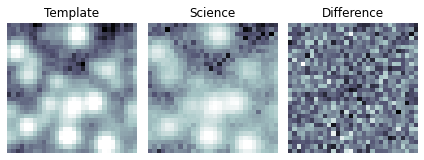

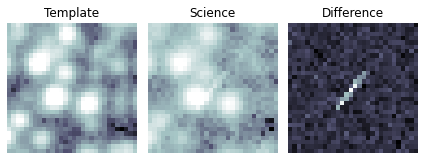

In [23]:
makeplots(default_Feb10,216144)

u/kherner/PREOPS-597_20220216_bg3 lsstdevapdb1


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.0.1/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.0.1/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


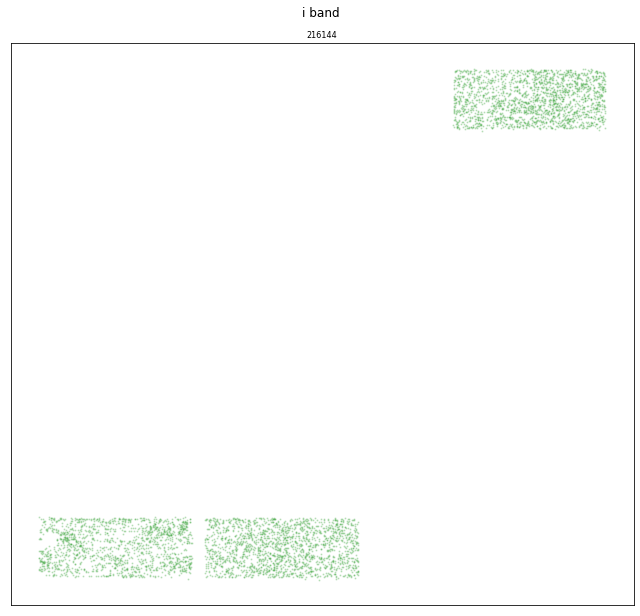

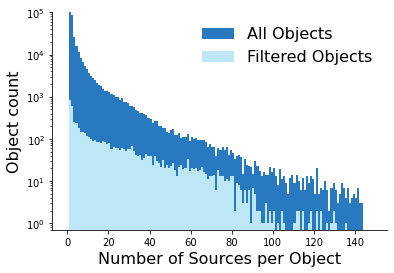

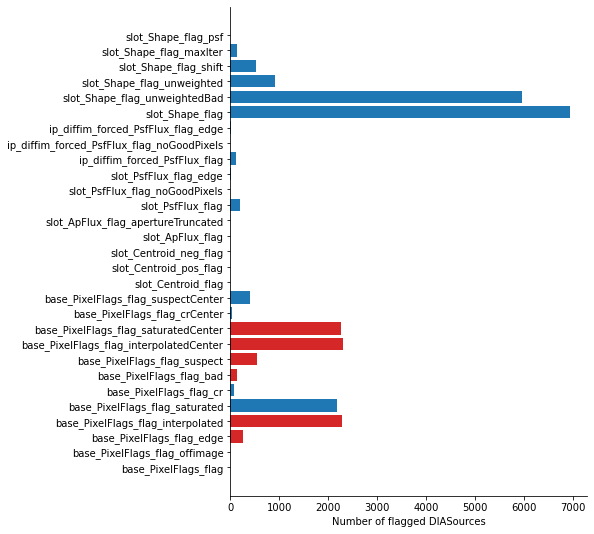

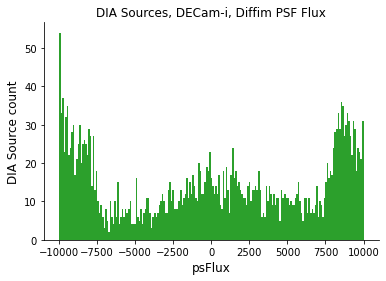

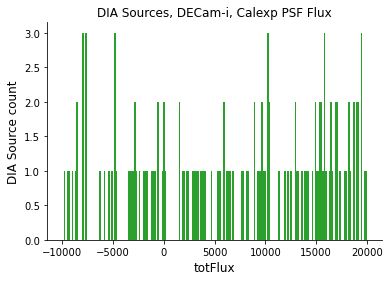

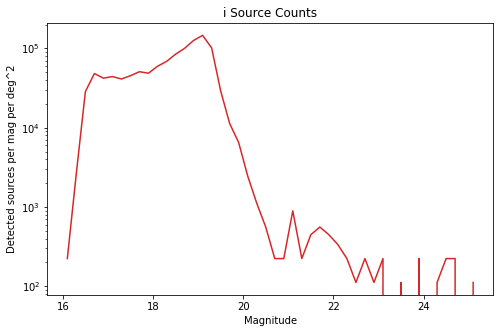

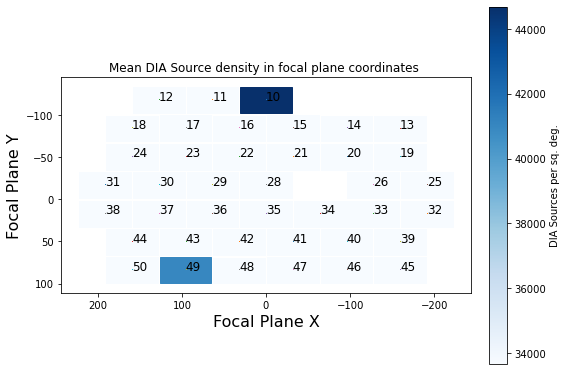

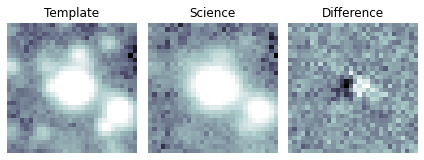

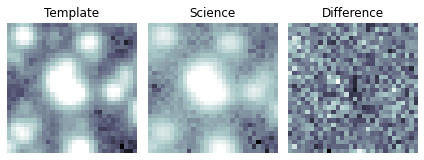

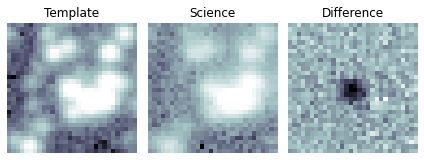

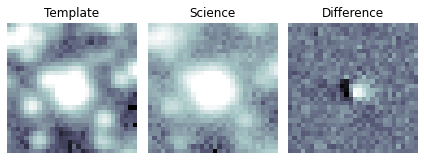

In [24]:
makeplots(default_bg3,216144)

u/kherner/PREOPS-597_20220218_bg4 lsstdevapdb1


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.0.1/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.0.1/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


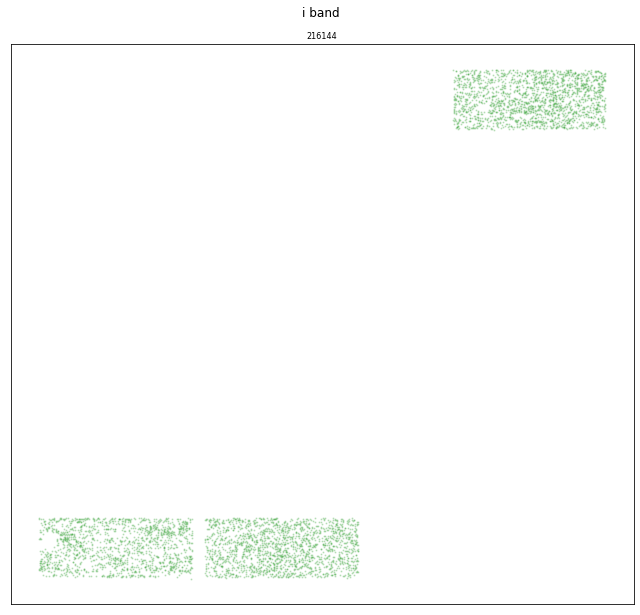

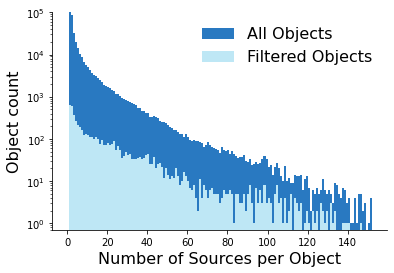

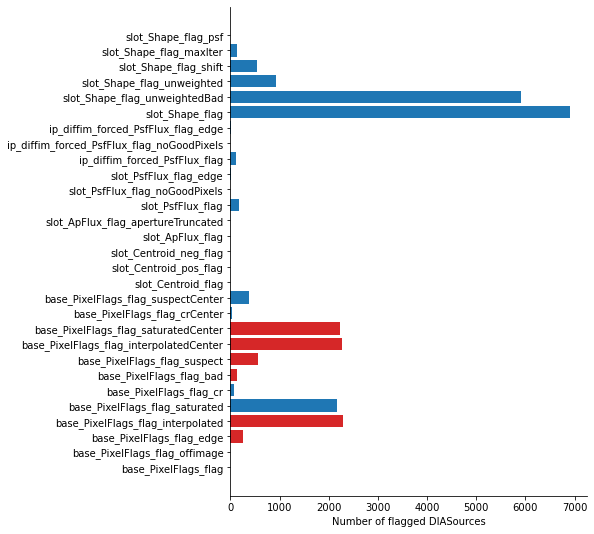

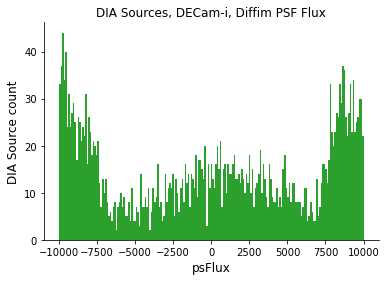

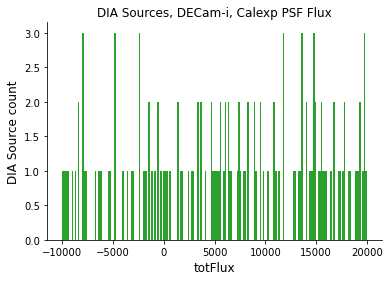

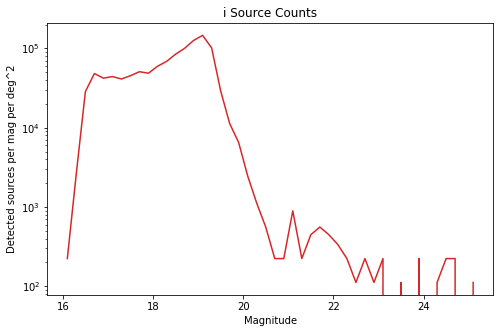

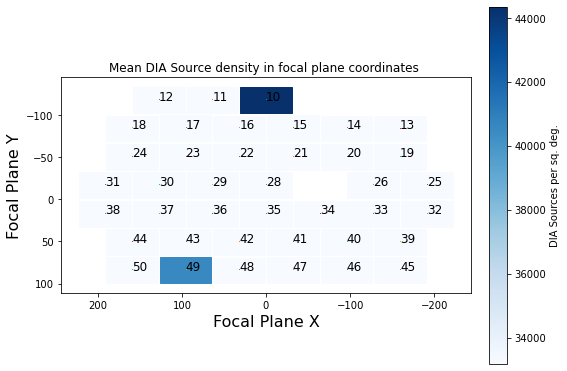

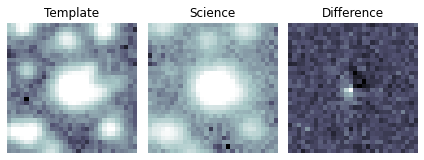

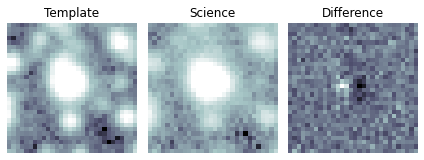

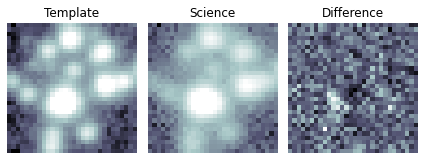

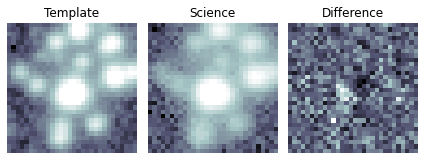

In [25]:
makeplots(default_bg4,216144)

u/kherner/PREOPS-597_20220218_bg5 lsstdevapdb1


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.0.1/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.0.1/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


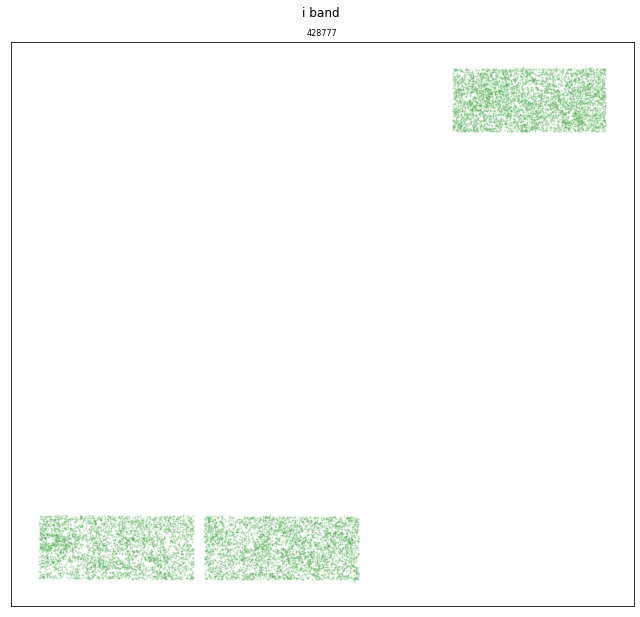

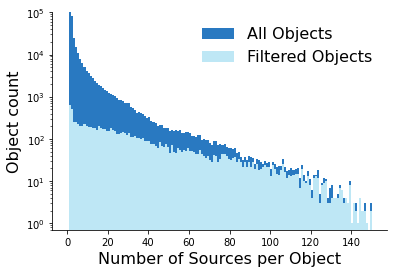

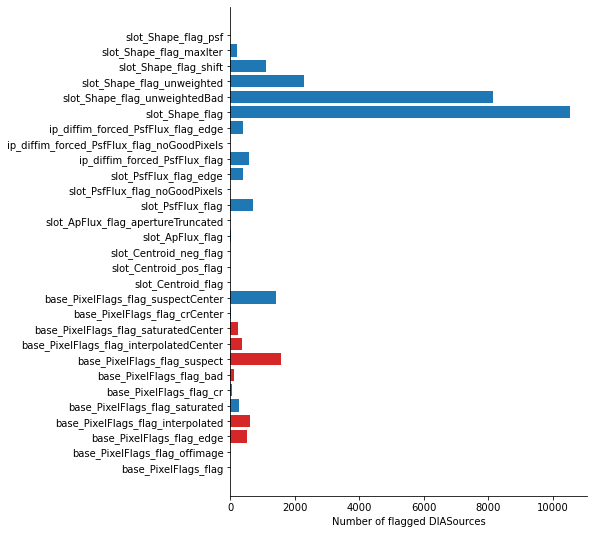

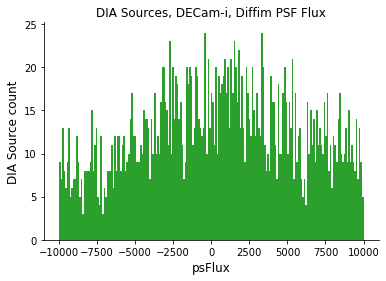

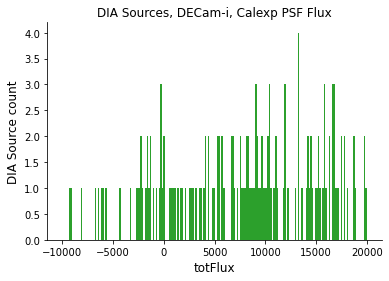

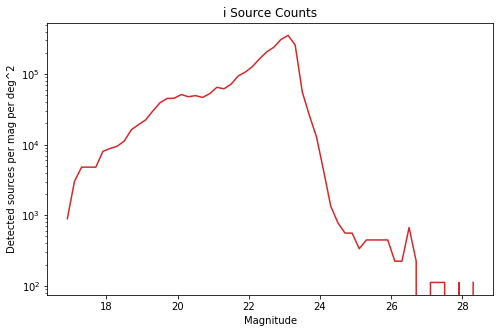

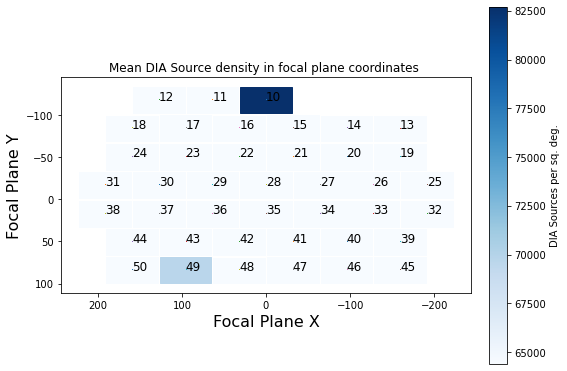

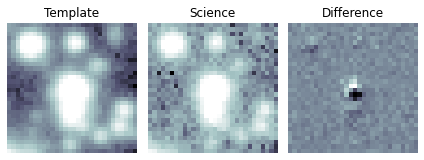

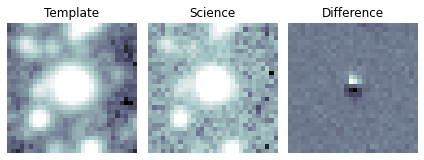

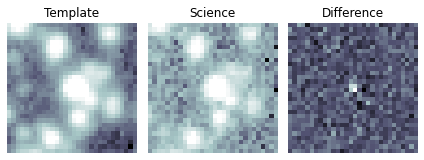

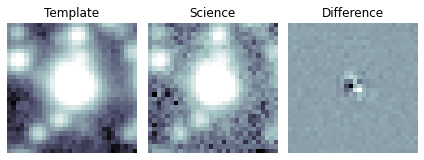

In [26]:
makeplots(default_bg5,428777)

u/kherner/PREOPS-597_20220218_bg5 lsstdevapdb1


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.0.1/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.0.1/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


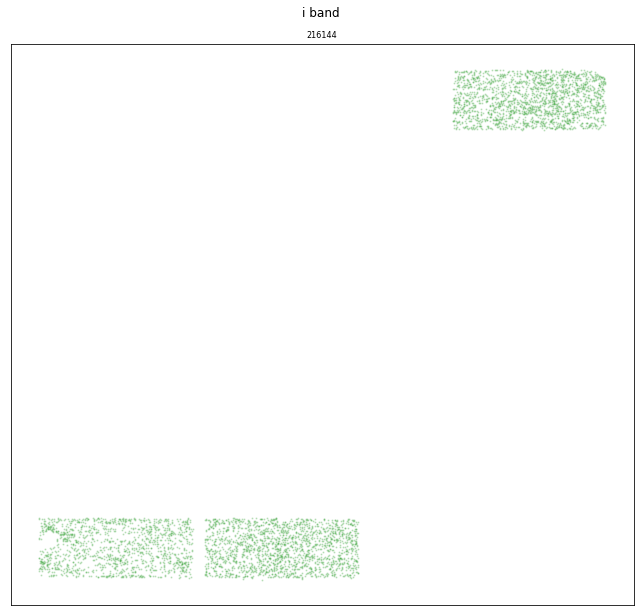

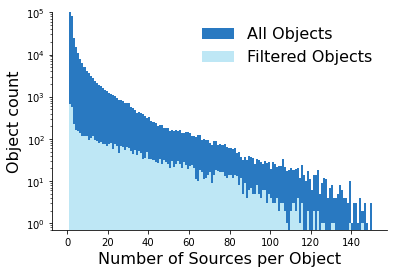

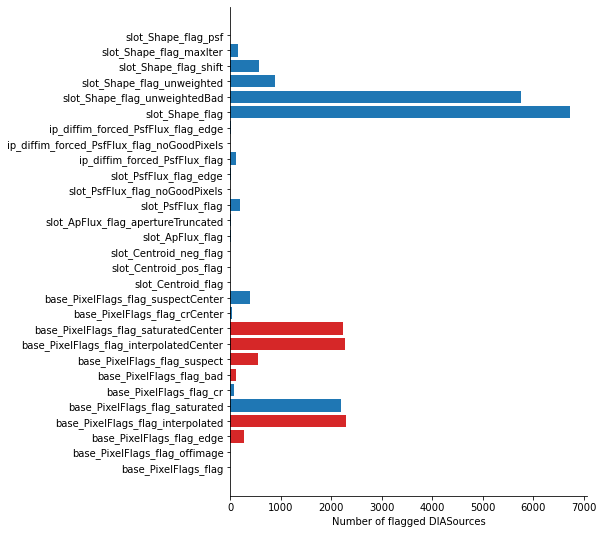

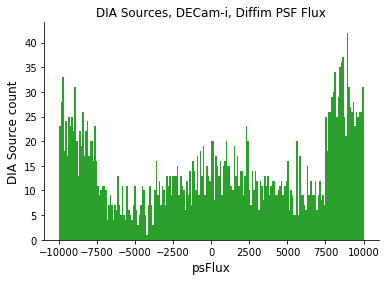

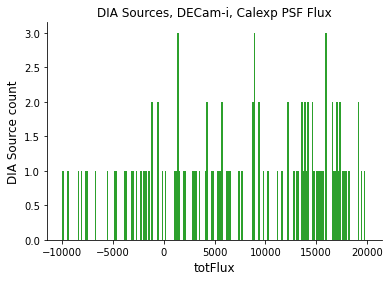

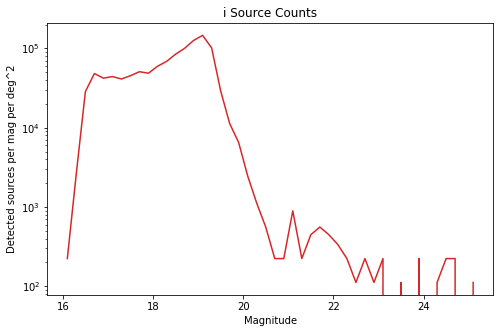

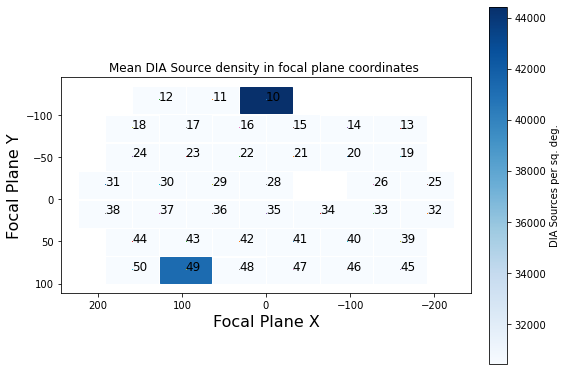

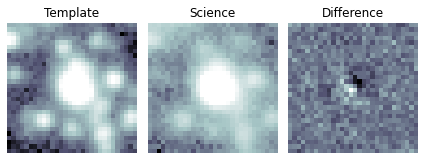

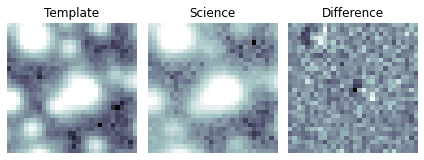

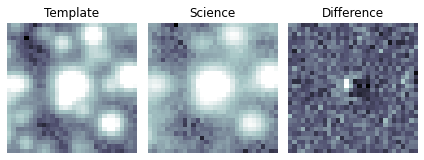

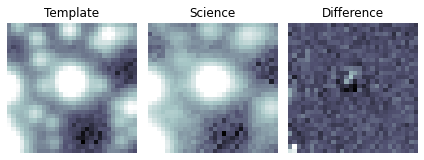

In [27]:
makeplots(default_bg5,216144)

u/kherner/PREOPS-597_20220210 lsstdevapdb1


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.0.1/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.0.1/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


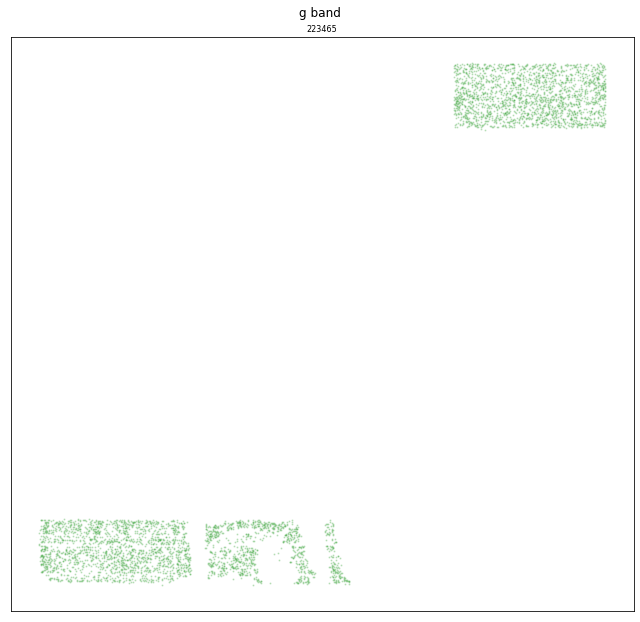

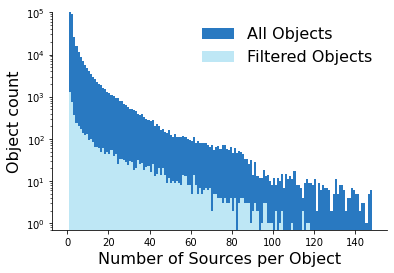

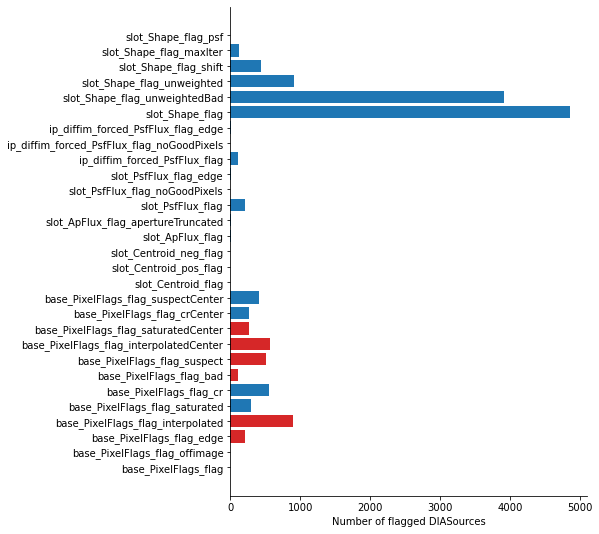

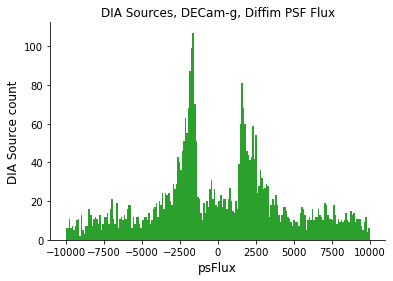

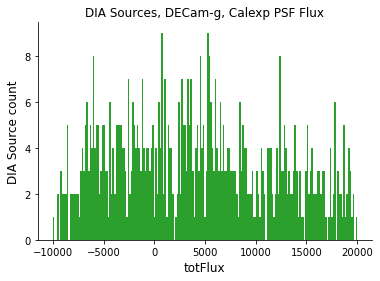

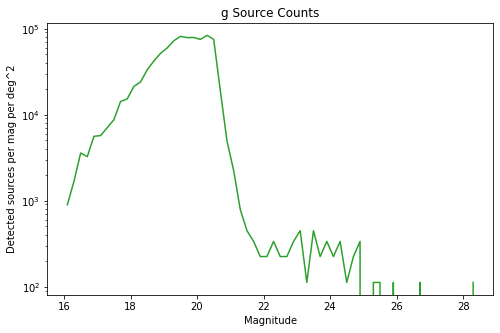

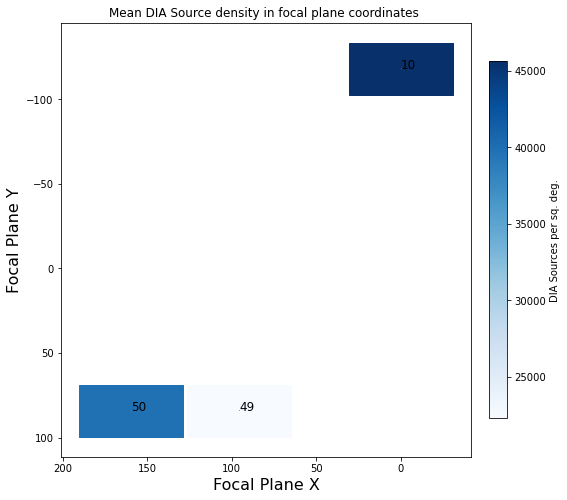

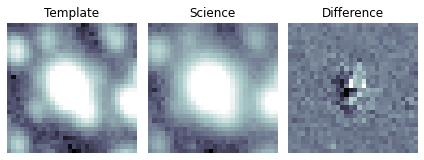

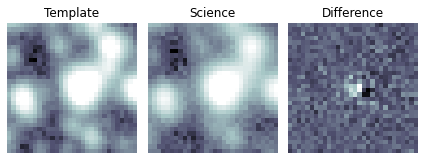

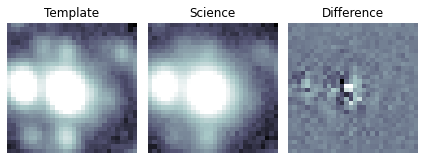

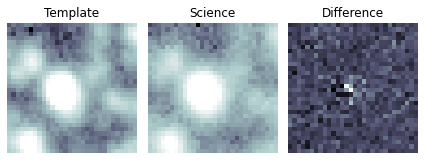

In [28]:
makeplots(default_Feb10,223465)

### The following code is for trying to plot DIASources in the usual scatter plot.

Due to memory consumption we aren't able to use the standard functions available in the ap_pipe-notebooks code.
Instead we've switched to using the daxapdb calls and we only pull out a seclect few columns in our query
which helps keep the memory consumption down.
We also do a scatter plot a little bit at a time by making slices in RA and DEC, making a sphgeom box based
on the pointing with some fill on each side in a grid pattern, extracting those sources, and then adding them
to the plot. Another way to do this would be to call tract by tract, which should be equivalent at the end of the day.

In [29]:
visitctrs = [[270.891667, -30.033889],[272.351667, -31.435000]]
# only using B1 and B2 for now; these are other Saha Bulge pointings.
#             [276.674583, -22.655833],[273.597083, -27.946944],
#             [276.674167, -33.756667],[267.045000, -37.137611]]

In [30]:
mytracts = []
for ctr in visitctrs:
    mycoord = lsst.geom.SpherePoint(ctr[0], ctr[1],lsst.geom.degrees)
    tract = skymap.findTract(mycoord)
    mytracts.append(tract.getId())
    for delx in [-1.2, 1.2]:
        mycoord = lsst.geom.SpherePoint(ctr[0]+delx, ctr[1],lsst.geom.degrees)
        tract = skymap.findTract(mycoord)
        mytracts.append(tract.getId())
    for dely in [-1.2, 1.2]:
        mycoord = lsst.geom.SpherePoint(ctr[0], ctr[1]+dely,lsst.geom.degrees)
        tract = skymap.findTract(mycoord)
        mytracts.append(tract.getId())
print(sorted(set(mytracts)))

[4555, 4556, 4764, 4765, 4766, 4978]


In [31]:
# As of May 2022 only the default user schema (your username) works for this interface.
# Adding support for other schemas is in the works.
myconn, mytable = doa.connectToApdb('lsstdevapdb1', dbType='postgres', schema='kherner')
#myconn, mytable = doa.connectToApdb('lsstdevapdb1', dbType='postgres', schema='kherner_PREOPS_597_20220120_i')

In [24]:
mycfg = daxApdb.ApdbSqlConfig()
mycfg.dia_object_index = "baseline"
mycfg.dia_object_columns = []
mycfg.extra_schema_file = os.path.join(
            "${AP_ASSOCIATION_DIR}",
            "data",
            "apdb-ap-pipe-schema-extra.yaml")
mycfg.db_url = 'postgresql://kherner@lsst-pg-devel1.ncsa.illinois.edu/lsstdevapdb1'

In [25]:
mydax = daxApdb.ApdbSql(mycfg)
# need start time (first visit)

In [26]:
print(mycfg.extra_schema_file)

${AP_ASSOCIATION_DIR}/data/apdb-ap-pipe-schema-extra.yaml


In [27]:
#testing the single pointing
mycoord = lsst.geom.SpherePoint(visitctrs[1][0], visitctrs[1][1],lsst.geom.degrees)
tpl = skymap.findTractPatchList([mycoord])

In [28]:
radecf = pd.DataFrame(columns=['ra', 'decl','filterName'])
from lsst.daf.base import dateTime

In [29]:
visitctrs = [[272.538533, -31.689947 ]] 

In [ ]:
ralim = (-0.25, 0.) #normally -1.25 to 1.25 to cover full DECam focal plane
declim = (-0.25, 0.) #normally -1.25 to 1.25 to cover full DECam focal plane
stepsize = 0.25
dt = dateTime.DateTime(0)
# need to fix for RA wraparound at some point
for x in range(int((ralim[1] - ralim[0])/stepsize)):
    dra = ralim[0] + x*stepsize
    for y in range(int((declim[1] - declim[0])/stepsize)):
        ddec = declim[0] + y*stepsize
        mybox = lsst.sphgeom.Box.fromDegrees(visitctrs[0][0] + dra,
                                             visitctrs[0][1] + ddec,
                                             visitctrs[0][0] + dra + stepsize,
                                             visitctrs[0][1] + ddec +stepsize)
        mypandas = mydax.getDiaSources(region=mybox, object_ids=None, visit_time=dt)
        myobjs = mydax.getDiaObjects(region=mybox)
        if not (mypandas.empty or myobjs.empty):
            flagTable, srcTableFlags, flagFilter, goodSrc, goodObj = pla.makeSrcTableFlags(mypandas, myobjs,
                                                                                   badFlagList=badFlagList,
                                                                                   gen='gen3', instrument='DECam',
                                                                                   repo=repo)
            radecf = radecf.append(goodSrc[['ra','decl','filterName']], ignore_index=True)
        else:
            print('mypandas empty for {} {}'.format(dra, ddec))

Text(0.5, 1.0, 'DIA Sources (PREOPS-597_20220120)')

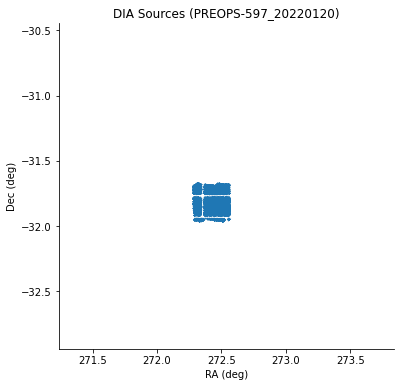

In [ ]:

fig = plt.figure(figsize=(6,6))
xlim = (visitctrs[0][0] - 1.3, visitctrs[0][0] + 1.3)
ylim = (visitctrs[0][1] - 1.25, visitctrs[0][1] + 1.25)
ax = fig.add_subplot(111)
plt.setp(ax, xlim=xlim, ylim=ylim)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.scatter(radecf.loc[radecf['filterName']=='i']['ra'], radecf.loc[radecf['filterName']=='i']['decl'], c='C0', s=0.1, marker='o', alpha=0.4)
ax.set_xlabel('RA (deg)')
ax.set_ylabel('Dec (deg)')
ax.set_title(f'DIA Sources ({str(collection).split("/")[-1]})')

In [25]:
myobjs = mydax.getDiaObjects(region=mybox)

In [41]:
print(len(mypandas))
byband1 = mypandas.loc[mypandas['filterName'] == 'i']
print(len(byband1))

print(len(radecf))
#mypandas = pla.addVisitCcdToSrcTable(mypandas, instrument='DECam', gen='gen3', butler=butler)


536645
351964
265262


Alternate way to grab diaSources by CCD

In [ ]:
dataId = {'visit': oneVisit, 'instrument': 'DECam', 'skymap': 'hsc_rings_v1'}
vdr = set(butler.registry.queryDimensionRecords('visit_detector_region',
                                            dataId=dataId,
                                            collections=collection,
                                            datasets='calexp'))
i = 0
for v in vdr:
    print('start {}'.format(i))
    try:
        myp = mydax.getDiaSources(region=v.region, object_ids=None, visit_time=dt)
    except:
        print('Error retrieving sources for {} CCD {}'.format(v.visit, v.detector))
    i += 1

59


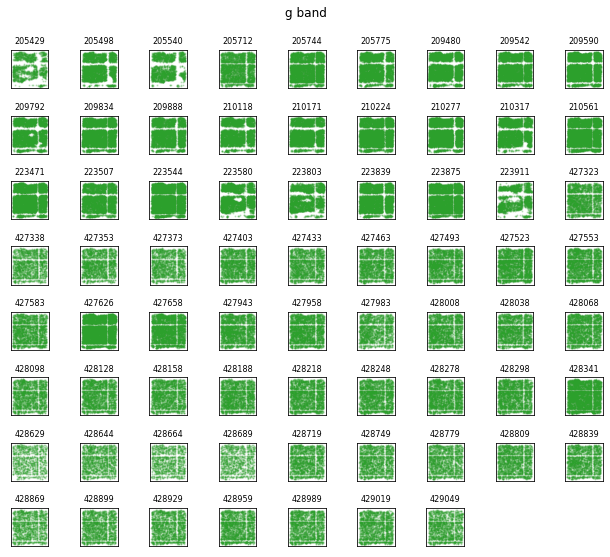

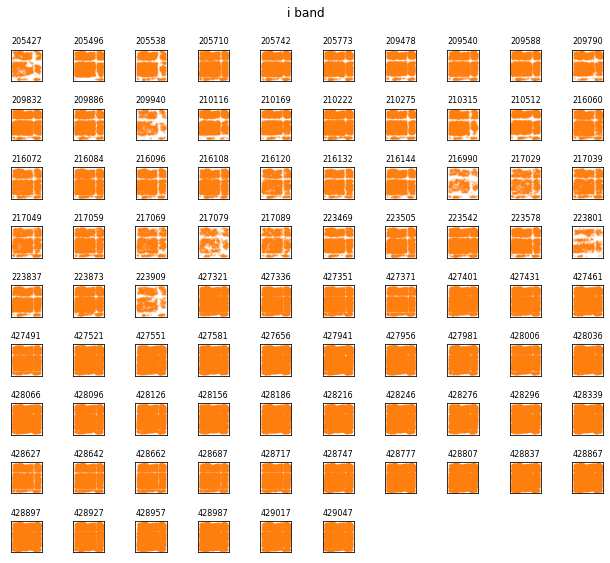

In [42]:
bandList = [ 'g', 'i' ]
colorList = ['C2', 'C1']
for band, color in zip(bandList, colorList):
    pla.plotDiaSourcesOnSkyGrid(repo, mypandas.loc[mypandas['filterName'] == band],
                                    title=band+' band', color=color, size=5)

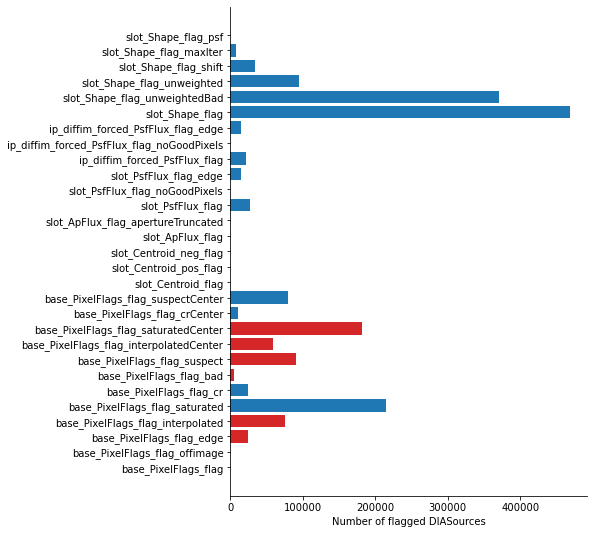

In [43]:
pla.plotFlagHist(mypandas, badFlagList=badFlagList)

In [44]:
flagTable, srcTableFlags, flagFilter, goodSrc, goodObj = pla.makeSrcTableFlags(mypandas, myobjs,
                                                                                   badFlagList=badFlagList,
                                                                                   gen='gen3', instrument='DECam',
                                                                                   repo=repo)

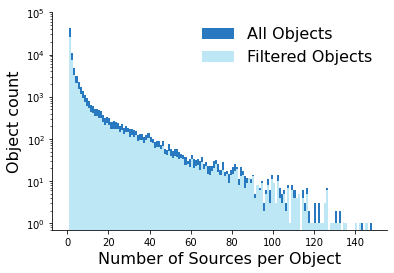

In [45]:
hist = doa.plotDiaObjectHistogram(myobjs, goodObj)

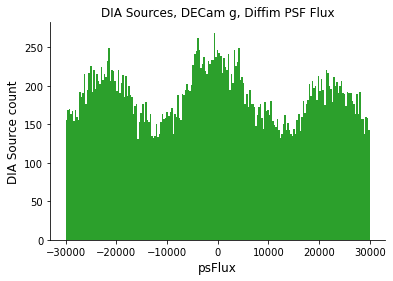

In [46]:
pla.plotFluxHistSrc(goodSrc.loc[goodSrc['filterName'] == 'g'].loc[goodSrc['visit']>=300000],
                    fluxType='psFlux', title='DIA Sources, DECam g, Diffim PSF Flux',
                    color1='C2', binmin=-3e4, binmax=3e4)

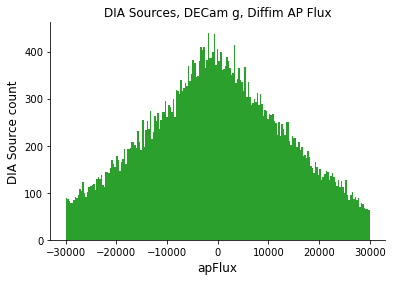

In [47]:
pla.plotFluxHistSrc(goodSrc.loc[goodSrc['filterName'] == 'g'].loc[goodSrc['visit']>=300000],
                    fluxType='apFlux', title='DIA Sources, DECam g, Diffim AP Flux',
                    color1='C2', binmin=-3e4, binmax=3e4)

In [ ]:
pla.plotFluxHistSrc(goodSrc.loc[goodSrc['filterName'] == 'g'].loc[goodSrc['visit']<300000],
                    fluxType='psFlux', title='DIA Sources, DECam g, Diffim PSF Flux',
                    color1='C2', binmin=-3e4, binmax=3e4)

In [ ]:
pla.plotFluxHistSrc(goodSrc.loc[goodSrc['filterName'] == 'g'].loc[goodSrc['visit']<300000],
                    fluxType='apFlux', title='DIA Sources, DECam g, Diffim AP Flux',
                    color1='C2', binmin=-3e4, binmax=3e4)

In [105]:
pla.plotFluxHistSrc(goodSrc.loc[goodSrc['filterName'] == 'i'], fluxType='psFlux',
                        title='DIA Sources, DECam i, Diffim PSF Flux', color1='C1', binmin=-2e4, binmax=2e4)

In [ ]:
pla.plotFluxHistSrc(goodSrc.loc[goodSrc['filterName'] == 'i'].loc[goodSrc['visit']>=300000],
                    fluxType='psFlux', title='DIA Sources, DECam i, Diffim PSF Flux',
                    color1='C1', binmin=-3e4, binmax=3e4)

In [ ]:
pla.plotFluxHistSrc(goodSrc.loc[goodSrc['filterName'] == 'i'].loc[goodSrc['visit']>=300000],
                    fluxType='apFlux', title='DIA Sources, DECam i, Diffim AP Flux',
                    color1='C1', binmin=-3e4, binmax=3e4)

In [ ]:
pla.plotFluxHistSrc(goodSrc.loc[goodSrc['filterName'] == 'i'].loc[goodSrc['visit']<300000],
                    fluxType='psFlux', title='DIA Sources, DECam i, Diffim PSF Flux',
                    color1='C1', binmin=-3e4, binmax=3e4)

In [ ]:
pla.plotFluxHistSrc(goodSrc.loc[goodSrc['filterName'] == 'i'].loc[goodSrc['visit']<300000],
                    fluxType='apFlux', title='DIA Sources, DECam i, Diffim AP Flux',
                    color1='C1', binmin=-3e4, binmax=3e4)

In [ ]:
pla.source_magnitude_histogram(repo, goodSrc, 'g', 'DECam', collection, badFlagList=badFlagList)

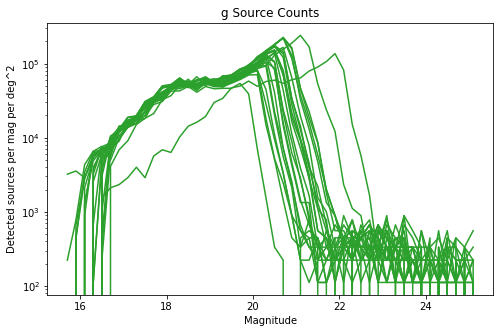

In [48]:
pla.source_magnitude_histogram(repo, goodSrc.loc[goodSrc['visit']<300000], 'g', 'DECam', collection, badFlagList=badFlagList)

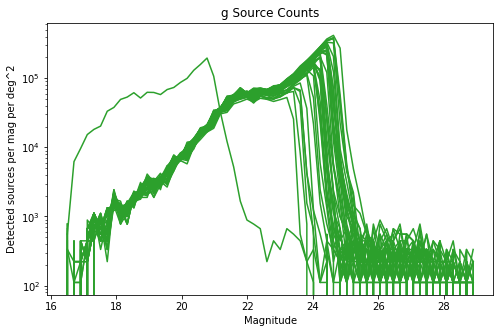

In [49]:
pla.source_magnitude_histogram(repo, goodSrc.loc[goodSrc['visit']>=300000], 'g', 'DECam', collection, badFlagList=badFlagList)

In [ ]:
pla.source_magnitude_histogram(repo, goodSrc, 'i', 'DECam', collection, badFlagList=badFlagList)

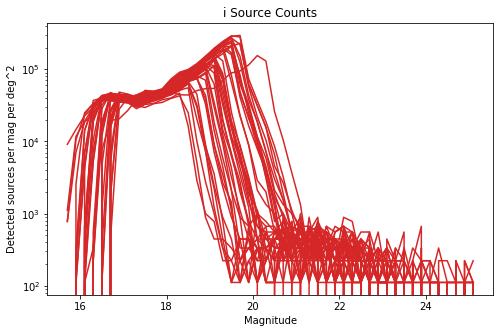

In [50]:
pla.source_magnitude_histogram(repo, goodSrc.loc[goodSrc['visit']<300000], 'i', 'DECam', collection, badFlagList=badFlagList)

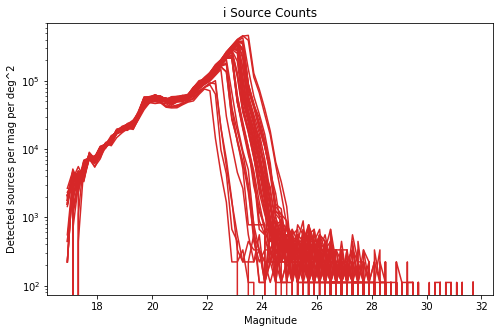

In [51]:
pla.source_magnitude_histogram(repo, goodSrc.loc[goodSrc['visit']>=300000], 'i', 'DECam', collection, badFlagList=badFlagList)

In [39]:
def showImages(visit,detector, collectionList):
    if len(collectionList) < 4: 
        return
    mycoll=collectionList[0]
    calexp = butler.get('calexp', instrument='DECam', visit=visit,
                    detector=detector, 
                    collections=mycoll.collection)
    diffim = butler.get(mycoll.selname+'Diff_differenceExp', instrument='DECam',
                        visit=visit, detector=detector, collections=mycoll.collection)
    mycoll=collectionList[1]
    calexp2 = butler.get('calexp', instrument='DECam', visit=visit,
                    detector=detector, 
                    collections=mycoll.collection)
    diffim2 = butler.get(mycoll.selname+'Diff_differenceExp', instrument='DECam',
                        visit=visit, detector=detector, collections=mycoll.collection)
    mycoll=collectionList[2]
    calexp3 = butler.get('calexp', instrument='DECam', visit=visit,
                    detector=detector, 
                    collections=mycoll.collection)
    diffim3 = butler.get(mycoll.selname+'Diff_differenceExp', instrument='DECam',
                        visit=visit, detector=detector, collections=mycoll.collection)
    mycoll=collectionList[3]
    calexp4 = butler.get('calexp', instrument='DECam', visit=visit,
                    detector=detector, 
                    collections=mycoll.collection)
    diffim4 = butler.get(mycoll.selname+'Diff_differenceExp', instrument='DECam',
                        visit=visit, detector=detector, collections=mycoll.collection)
    display1.mtv(calexp)
    display2.mtv(calexp2)
    display3.mtv(calexp3)
    display4.mtv(calexp4)
    display5.mtv(diffim)
    display6.mtv(diffim2)
    display7.mtv(diffim3)
    display8.mtv(diffim4)

In [37]:
collection_list = [default_Feb10, default_bg3, default_bg4, default_bg5]

In [38]:
# Set up in-line Fifefly display
afwDisplay.setDefaultBackend('firefly')
display1 = afwDisplay.Display(frame=1, name='calexp1')
display2 = afwDisplay.Display(frame=2, name='calexp2')
display3 = afwDisplay.Display(frame=3, name='calexp3')
display4 = afwDisplay.Display(frame=4, name='calexp4')

display5 = afwDisplay.Display(frame=5, name='diffim1')
display6 = afwDisplay.Display(frame=6, name='diffim2')
display7 = afwDisplay.Display(frame=7, name='diffim3')
display8 = afwDisplay.Display(frame=8, name='diffim4')
IFrame(display1._url, 1800, 1000)

Show the difference images side by side for the four  background fitting order comparisons.
One shown as example but any visit/CCD combination is possible.

In [40]:
showImages(216144, 50, collection_list)

In [41]:
showImages(205421, 10, collection_list)

In [43]:
showImages(205421, 49, collection_list)

In [50]:
showImages(428777, 49, collection_list)

In [48]:
showImages(223465, 49, collection_list)

In [51]:
showImages(216144, 49, collection_list)

In [52]:
showImages(428774, 49, collection_list)

In [53]:
showImages(205419, 49, collection_list)

In [54]:
showImages(205427, 49, collection_list)

In [55]:
showImages(205429, 49, collection_list)

In [56]:
showImages(216142, 49, collection_list)

## Summary of current status

 * Overall the broad picture as described in DMTN-171 is unchanged. 
 * We perhaps see some marginal improvement when increasing the background fit order, but the changes are not highly significant.
 * We do not think a major update of DMTN-171 is required at this point.
 * We will revisit the situation after the 2022 image difference refactor is complete.